In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import utils


features_1 = [
    'sx_x',
    'sx_y',
    'sx_z',
    'sx_roll',
    'sx_pitch',
    'sx_yaw',
    'sx_thumb',
    'sx_forefinger',
    'sx_middle_finger',
    'sx_ring_finger',
    'sx_little_finger',
    'dx_x',
    'dx_y',
    'dx_z',
    'dx_roll',
    'dx_pitch',
    'dx_yaw',
    'dx_thumb',
    'dx_forefinger',
    'dx_middle_finger',
    'dx_ring_finger',
    'dx_little_finger'
    ]


In [2]:
path = "./tctodd/"
dirs = os.listdir(path=path)
weeks = sorted([i for i in dirs if i != ".DS_Store"])
filenames = sorted(os.listdir(path+weeks[1]))

data = []
labels = dict()
label_cnt = 0

for w in weeks:
    temp_path = path+w+"/"
    filenames = sorted(os.listdir(temp_path))
    for fn in filenames:
        label = fn.split('.')[0][:-2]
        
        if label not in labels:
            labels[label] = label_cnt
            label_cnt += 1
            
        data.append({'label':labels[label], 'time_series':pd.read_csv(temp_path+fn, header=None, sep='\t',).values})
        

In [3]:
df = pd.DataFrame(data, columns=['label', 'time_series'])

In [32]:
one = labels['hello'] # one-handed
two = labels['wrong'] #two-handed
spec_two = labels['where'] #specular two-handed

one_mask = df['label'] == one
two_mask = df['label'] == two
spec_two_mask = df['label'] == spec_two

one_data = df[one_mask].iloc[0]['time_series']
two_data = df[two_mask].iloc[0]['time_series']
spec_two_data = df[spec_two_mask].iloc[0]['time_series']

In [41]:
for i,v in zip(features_1,np.std(one_data, axis=0)):
    print(f"feature {i}, variance: {v}")

a = np.mean(one_data, axis=0)
a[:3] + a[11:14]

feature sx_x, variance: 0.011165156852368052
feature sx_y, variance: 0.00185070747089322
feature sx_z, variance: 0.0013716773996307033
feature sx_roll, variance: 0.0013970627926725892
feature sx_pitch, variance: 0.0028525606967453
feature sx_yaw, variance: 0.0009095776376583846
feature sx_thumb, variance: 0.021322331452090545
feature sx_forefinger, variance: 0.0
feature sx_middle_finger, variance: 0.0
feature sx_ring_finger, variance: 0.0
feature sx_little_finger, variance: 0.0
feature dx_x, variance: 0.07063949254625011
feature dx_y, variance: 0.17024042042824644
feature dx_z, variance: 0.029998826575126154
feature dx_roll, variance: 0.03633641321150181
feature dx_pitch, variance: 0.16139219277660036
feature dx_yaw, variance: 0.05323455305283075
feature dx_thumb, variance: 0.13021297862343345
feature dx_forefinger, variance: 0.0
feature dx_middle_finger, variance: 0.0
feature dx_ring_finger, variance: 0.0
feature dx_little_finger, variance: 0.02216647785157653


array([-0.02232011, -0.17016532, -0.06251765])

In [40]:
for i,v in zip(features_1,np.std(two_data, axis=0)):
    print(f"feature {i}, variance: {v}")    
    
a = np.mean(two_data, axis=0)
a[:3] + a[11:14]

feature sx_x, variance: 0.01048348049054769
feature sx_y, variance: 0.005272722916651911
feature sx_z, variance: 0.00588456883224312
feature sx_roll, variance: 0.002963323895657179
feature sx_pitch, variance: 0.004289325482964445
feature sx_yaw, variance: 0.002804686531055752
feature sx_thumb, variance: 0.007025789686611188
feature sx_forefinger, variance: 0.013452382440820745
feature sx_middle_finger, variance: 0.0
feature sx_ring_finger, variance: 0.0
feature sx_little_finger, variance: 0.0010890491805456077
feature dx_x, variance: 0.029863804086819677
feature dx_y, variance: 0.08175705990019003
feature dx_z, variance: 0.03641375850743023
feature dx_roll, variance: 0.08750239675490686
feature dx_pitch, variance: 0.10501956490257437
feature dx_yaw, variance: 0.04747487988150332
feature dx_thumb, variance: 0.3229908856031885
feature dx_forefinger, variance: 0.2697828335938913
feature dx_middle_finger, variance: 0.4207064431806487
feature dx_ring_finger, variance: 0.18173953691313355
fe

array([-0.07963665,  0.02504908, -0.13036575])

In [43]:
# to see mirrored actions, I used the mean value
for i,v in zip(features_1,np.mean(spec_two_data, axis=0)):
    print(f"feature {i}, variance: {v}")

a = np.mean(spec_two_data, axis=0)
a[:3] + a[11:14]

feature sx_x, variance: -0.14257821739130436
feature sx_y, variance: 0.014393489130434782
feature sx_z, variance: 0.00737536956521739
feature sx_roll, variance: 0.5208356195652173
feature sx_pitch, variance: 0.505566847826087
feature sx_yaw, variance: 0.5137581304347826
feature sx_thumb, variance: 0.5891771086956522
feature sx_forefinger, variance: 0.08058682608695653
feature sx_middle_finger, variance: 0.0
feature sx_ring_finger, variance: 0.0006403369565217391
feature sx_little_finger, variance: 0.005781413043478262
feature dx_x, variance: 0.11096769565217393
feature dx_y, variance: -0.01105716304347826
feature dx_z, variance: -0.03274642391304348
feature dx_roll, variance: 0.4689650217391304
feature dx_pitch, variance: 0.4857985434782608
feature dx_yaw, variance: 0.5228687717391304
feature dx_thumb, variance: 0.7690138913043482
feature dx_forefinger, variance: 0.0
feature dx_middle_finger, variance: 0.0
feature dx_ring_finger, variance: 0.0
feature dx_little_finger, variance: 0.1088

array([-0.03161052,  0.00333633, -0.02537105])

"plt.tick_params(\n    axis='both',          # changes apply to the x-axis\n    which='both',      # both major and minor ticks are affected\n    bottom=False,      # ticks along the bottom edge are off\n    top=False,         # ticks along the top edge are off\n    labelbottom=False) # labels along the bottom edge are off"

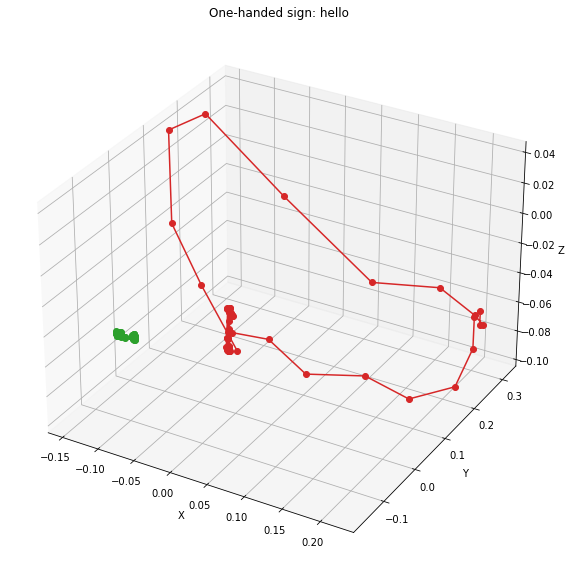

In [80]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
sx_xs = one_data[:,0][:]
sx_ys = one_data[:,1][:]
sx_zs = one_data[:,2][:]
dx_xs = one_data[:,11][:]
dx_ys = one_data[:,12][:]
dx_zs = one_data[:,13][:]

ax.plot(sx_xs, sx_ys, sx_zs, marker='o', label='sx', color='tab:green', alpha=1)
ax.plot(dx_xs, dx_ys, dx_zs, marker='o', label='sx', color='tab:red', alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('One-handed sign: hello')
'''plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off'''

In [73]:
sx_xs

-0.083439

In [74]:
sx_xs = one_data[:,0]
sx_ys = one_data[:,1]
sx_zs = one_data[:,2]
dx_xs = one_data[:,11]
dx_ys = one_data[:,12]
dx_zs = one_data[:,13]

In [75]:
sx_xs

array([-0.103487, -0.105898, -0.108979, -0.108443, -0.107148, -0.108532,
       -0.108889, -0.108175, -0.107639, -0.10813 , -0.106657, -0.105362,
       -0.105407, -0.105853, -0.104692, -0.103621, -0.105451, -0.107371,
       -0.1063  , -0.107371, -0.108934, -0.108979, -0.108443, -0.109336,
       -0.107595, -0.107595, -0.110274, -0.085716, -0.083394, -0.096343,
       -0.0967  , -0.083662, -0.0967  , -0.102192, -0.083394, -0.08402 ,
       -0.082993, -0.086252, -0.084466, -0.084287, -0.083662, -0.084064,
       -0.084779, -0.083618, -0.083707, -0.085314, -0.084421, -0.083796,
       -0.085404, -0.084913, -0.084243, -0.084734, -0.085404, -0.084511,
       -0.08393 , -0.084823, -0.084689, -0.083439, -0.084064, -0.084466,
       -0.083662, -0.083439])

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_14770/1219925185.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,10))


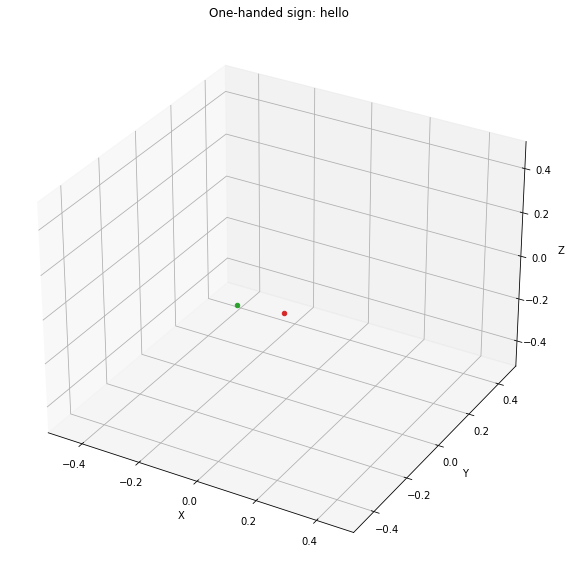

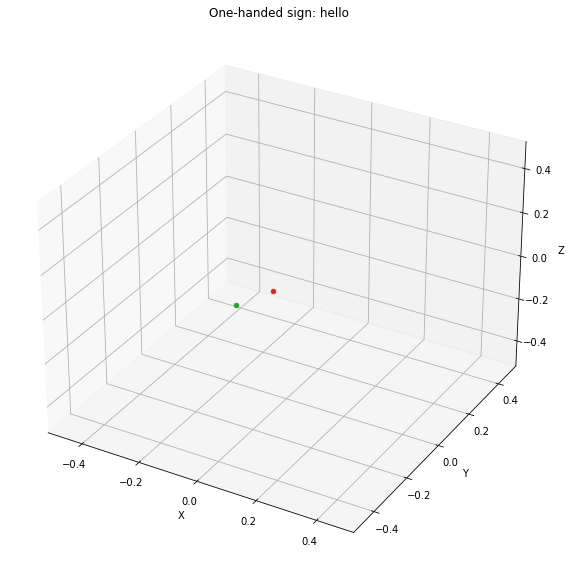

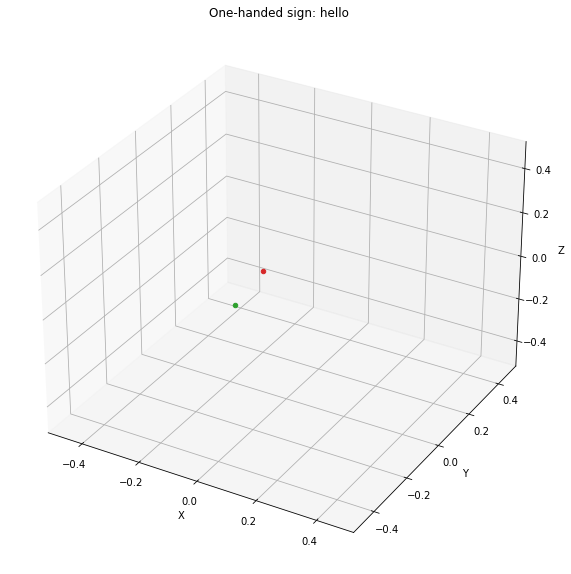

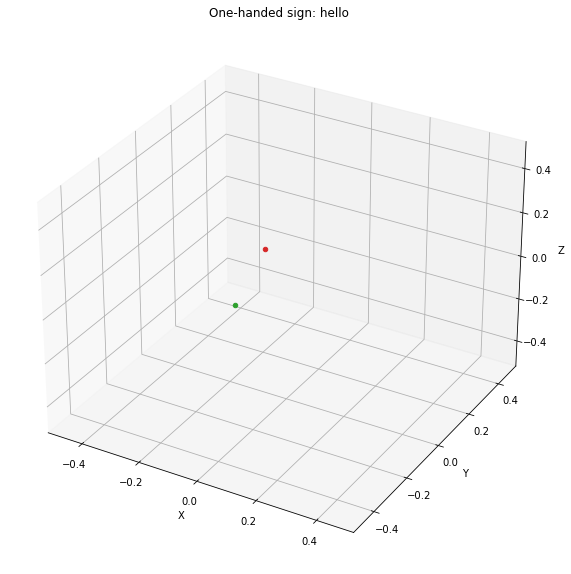

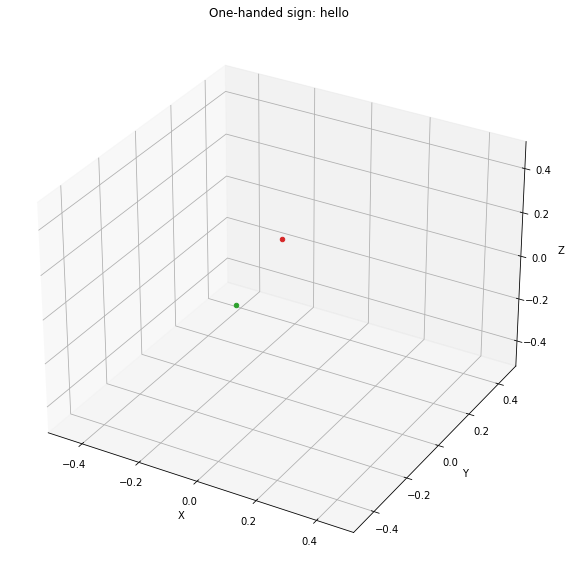

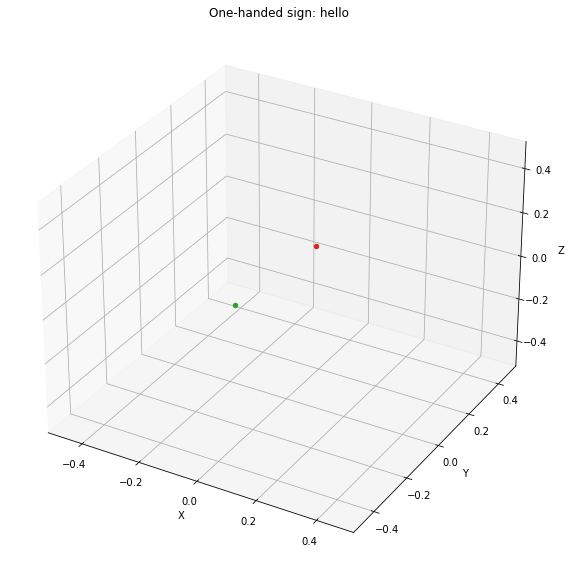

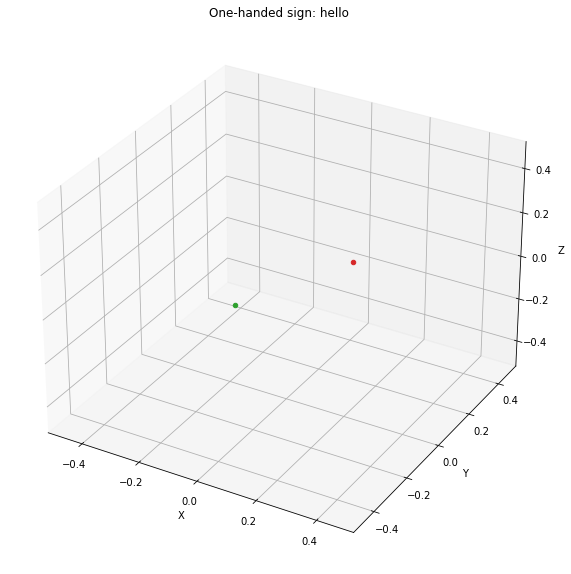

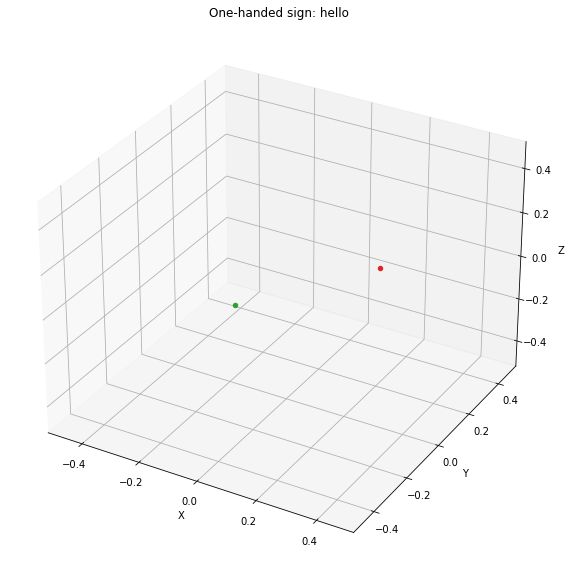

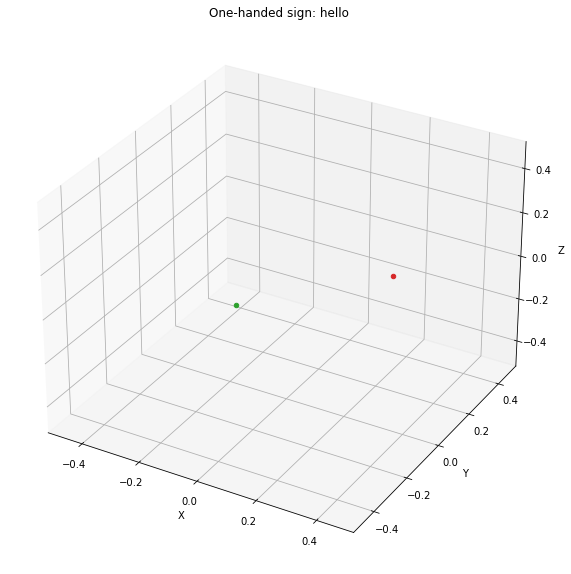

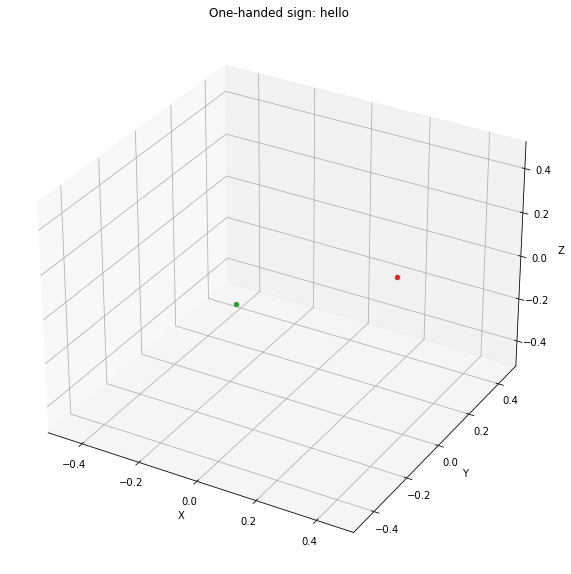

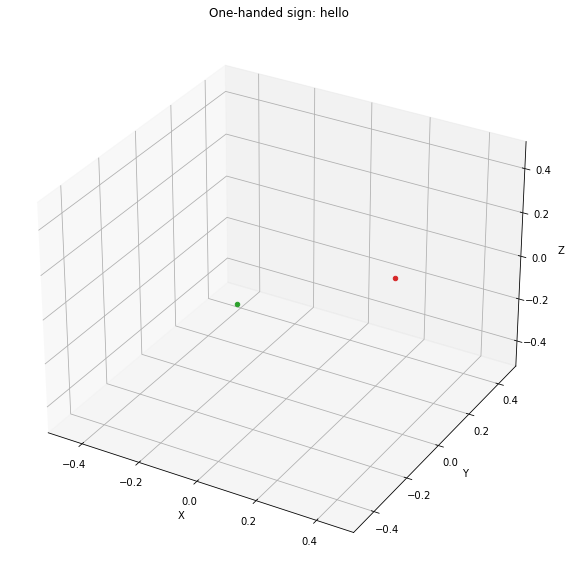

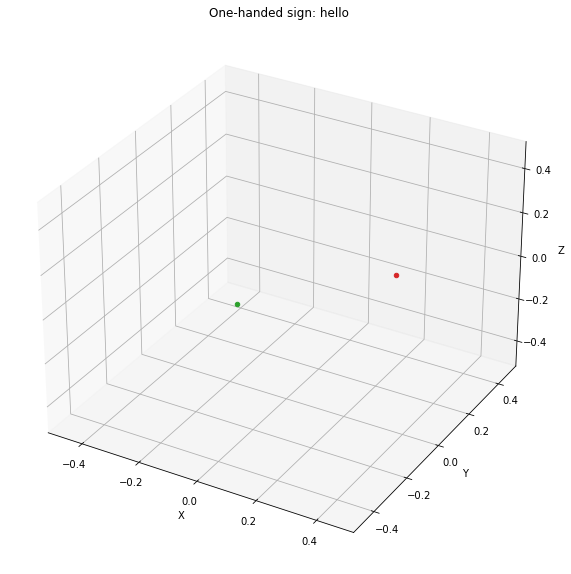

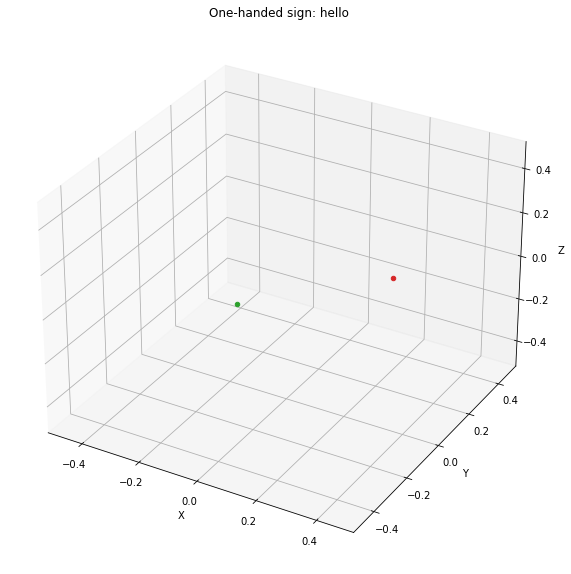

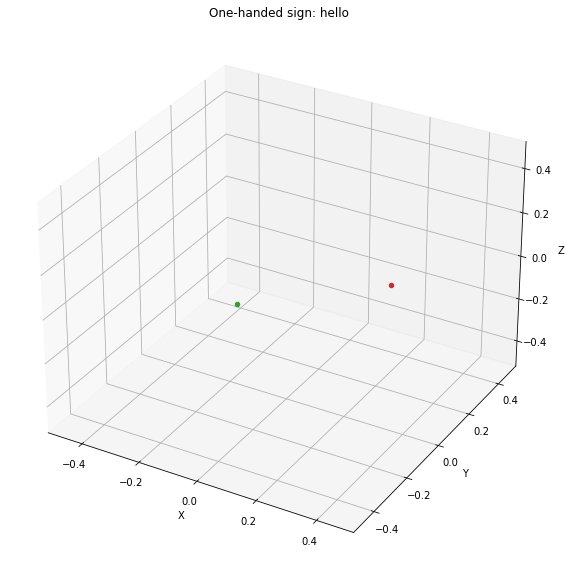

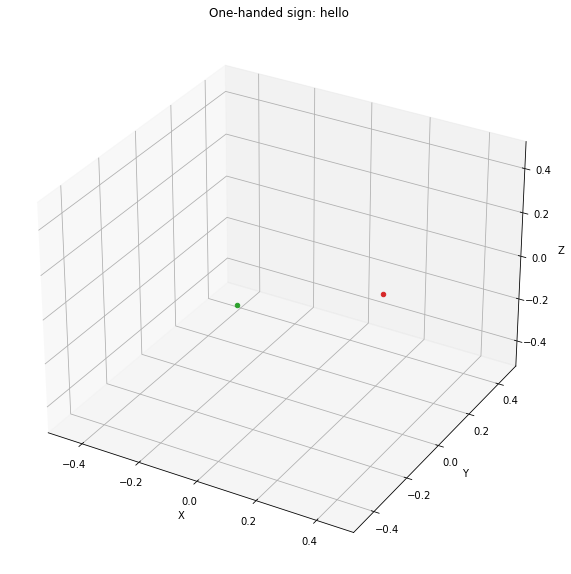

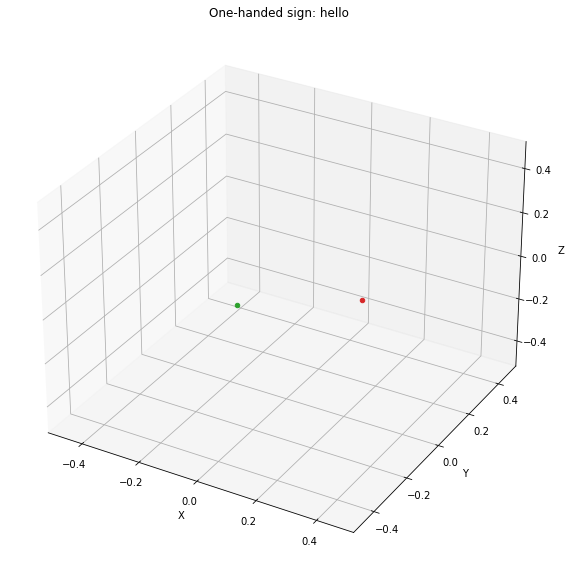

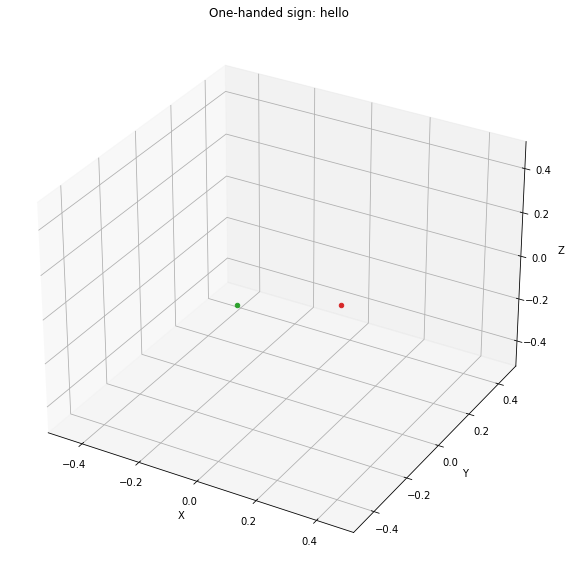

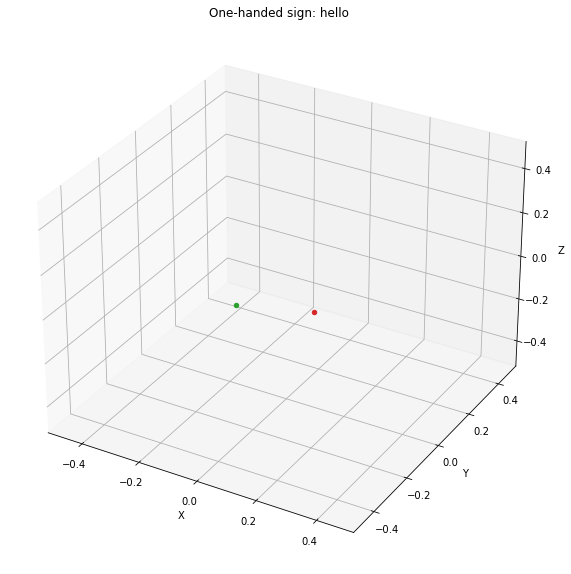

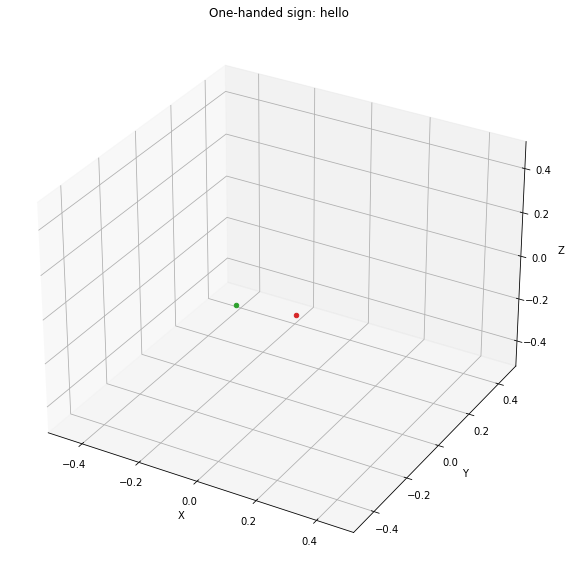

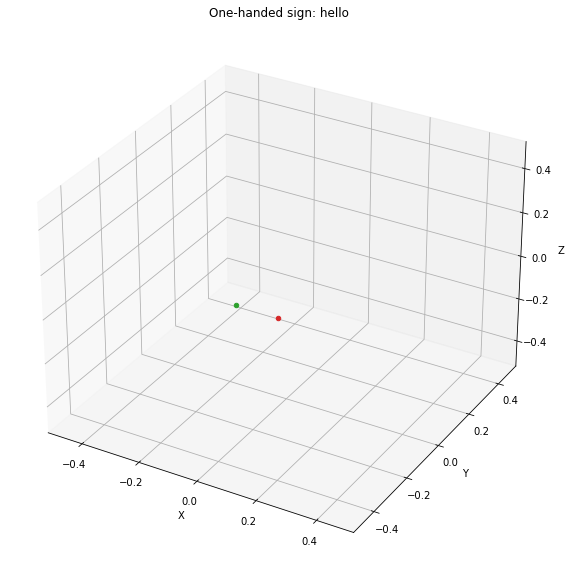

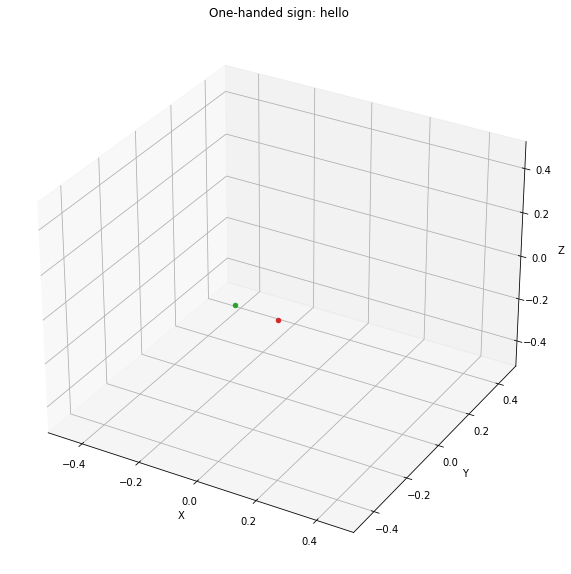

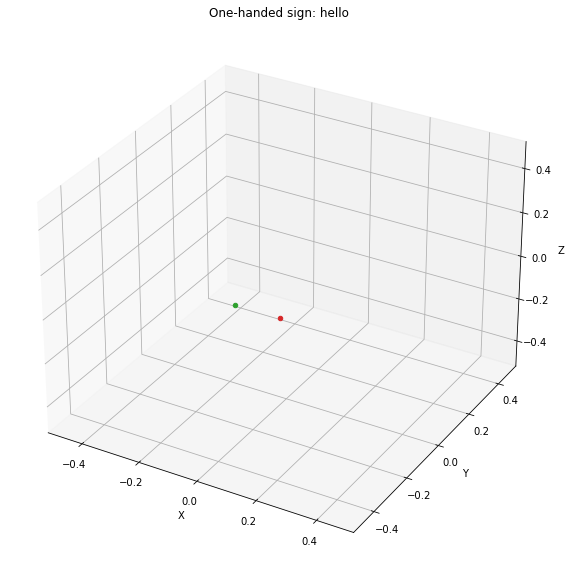

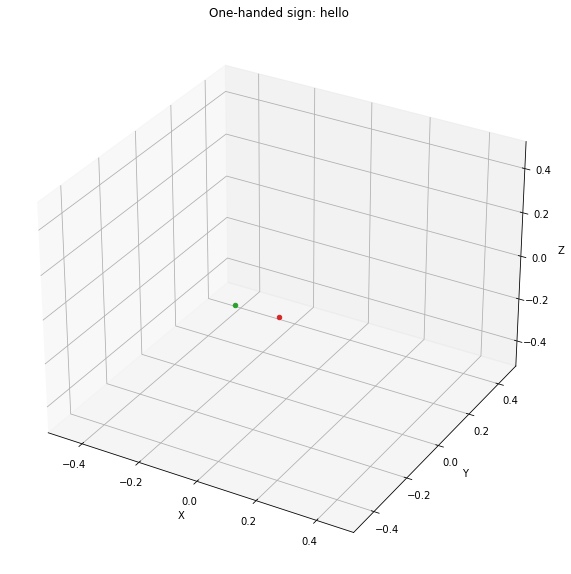

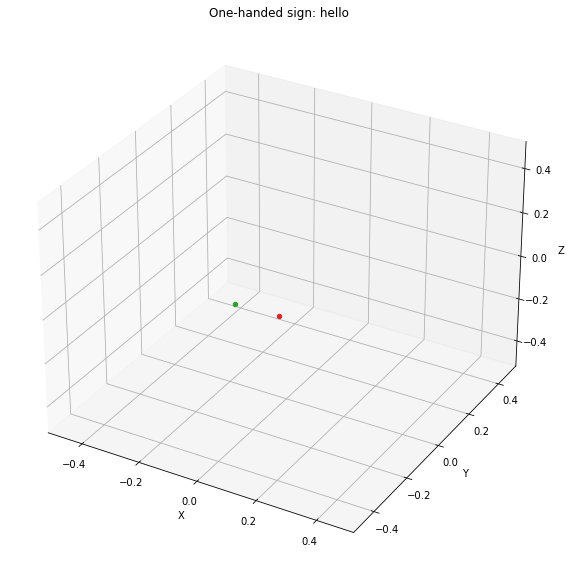

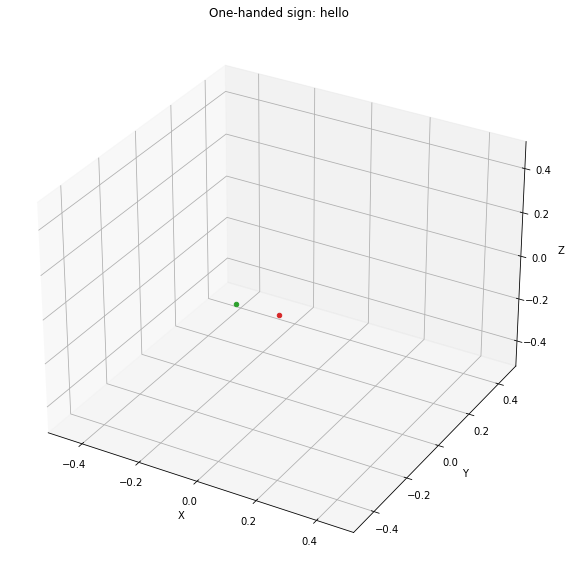

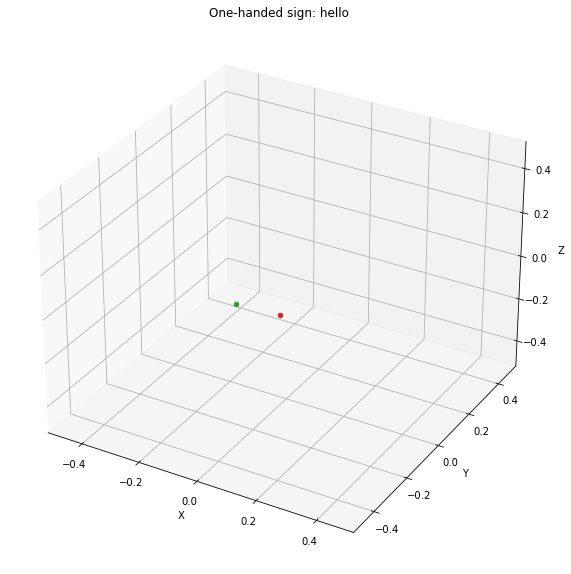

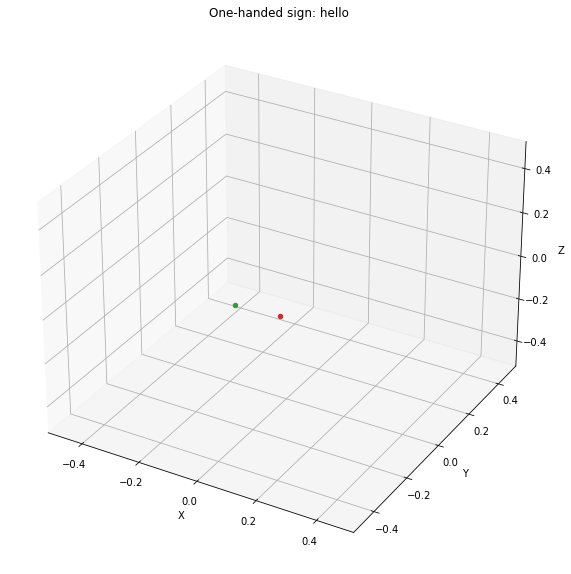

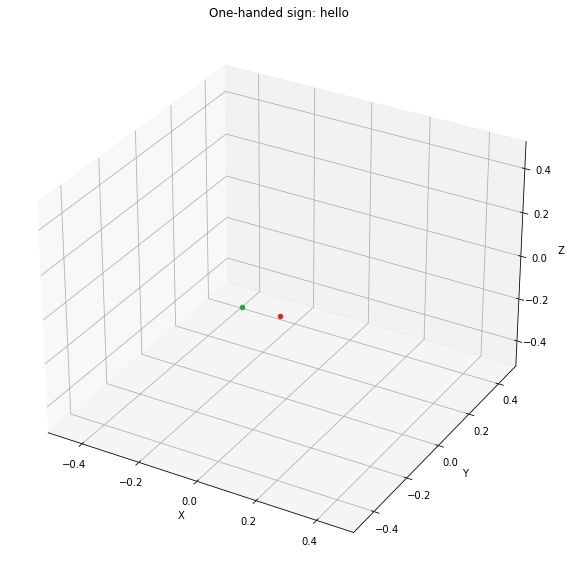

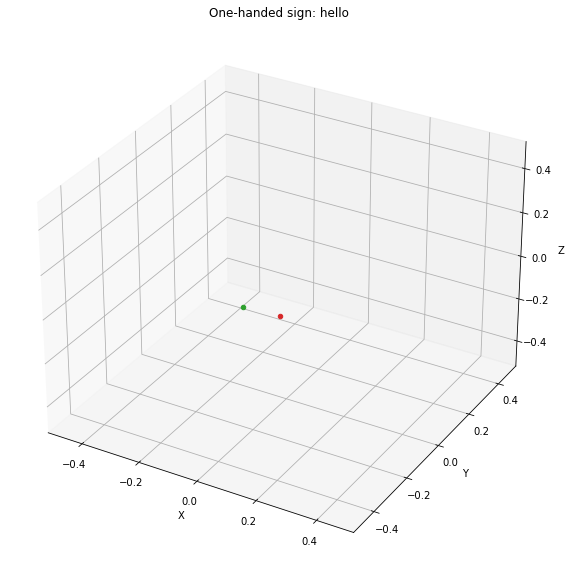

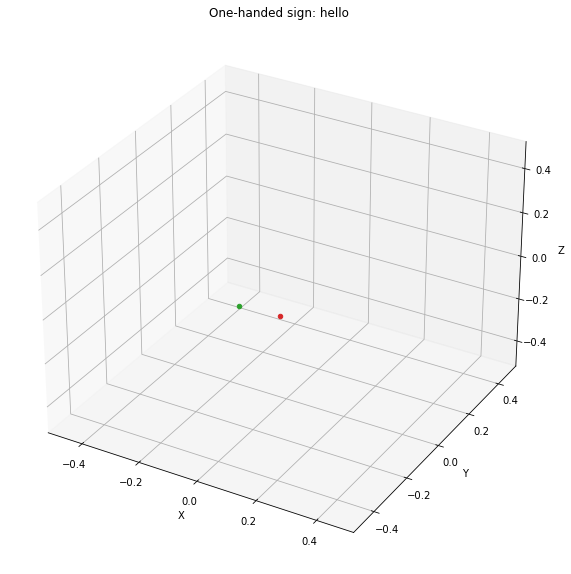

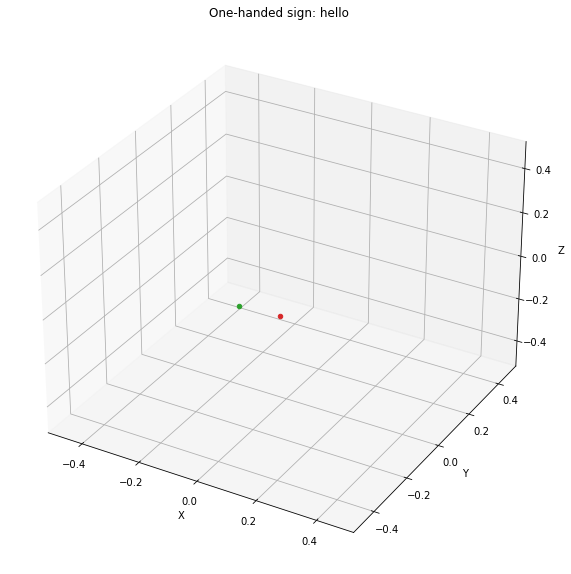

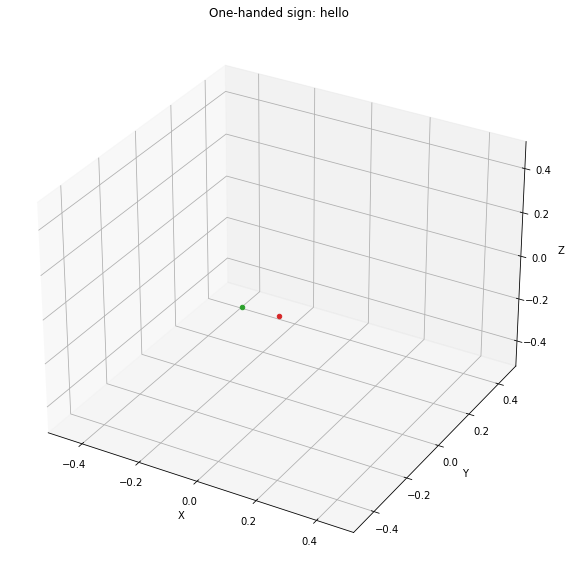

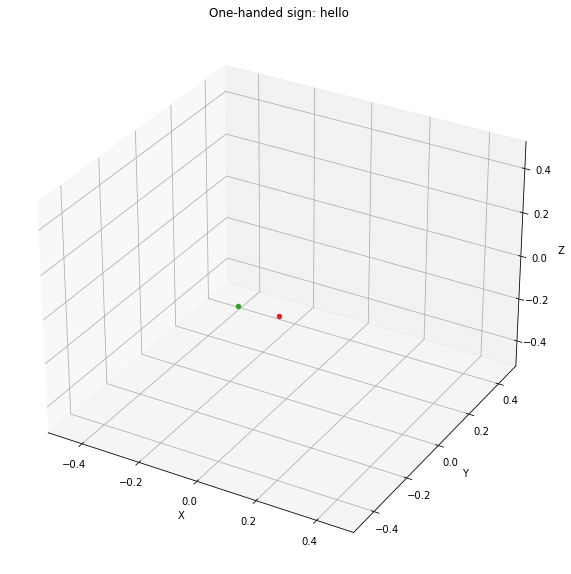

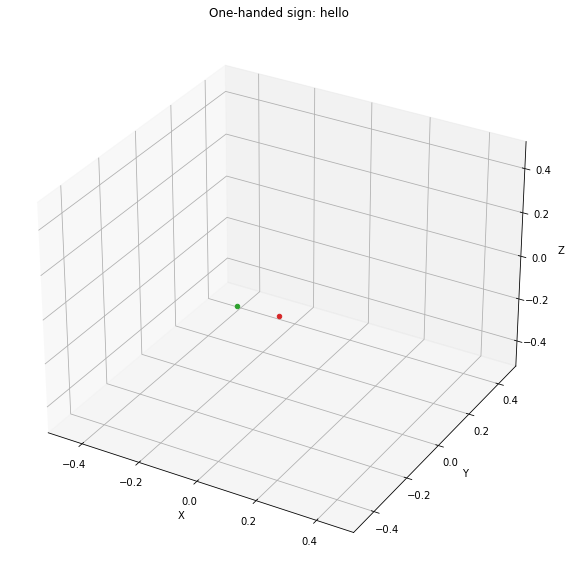

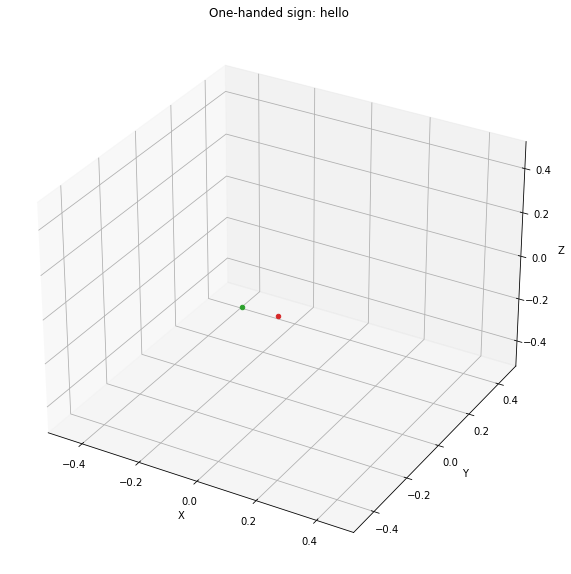

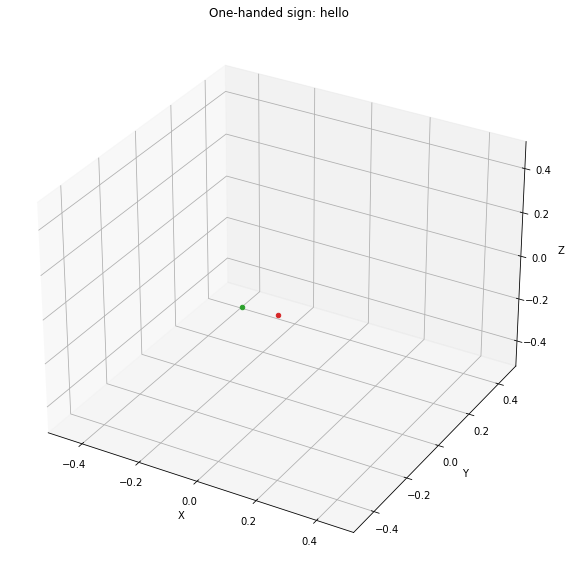

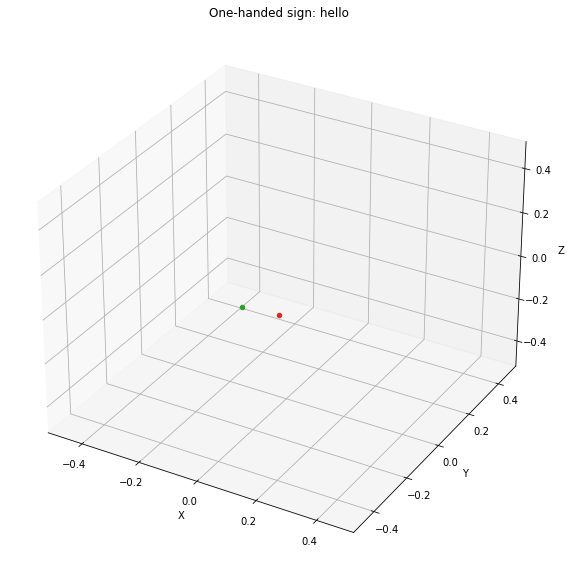

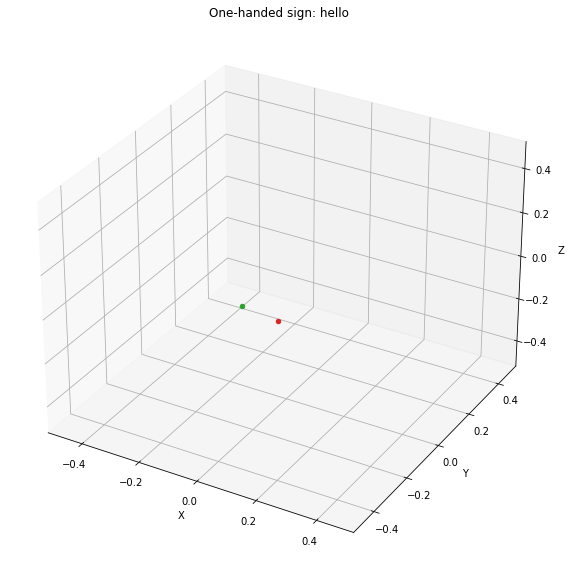

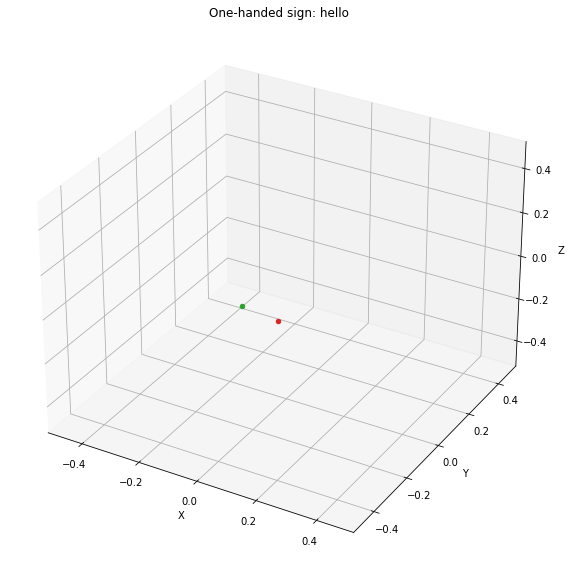

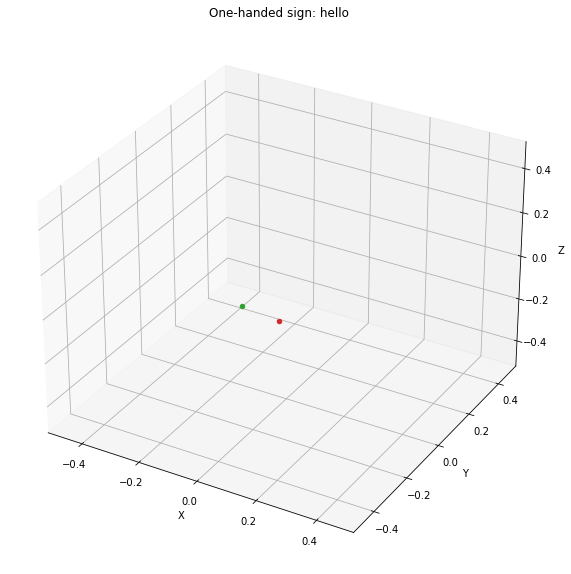

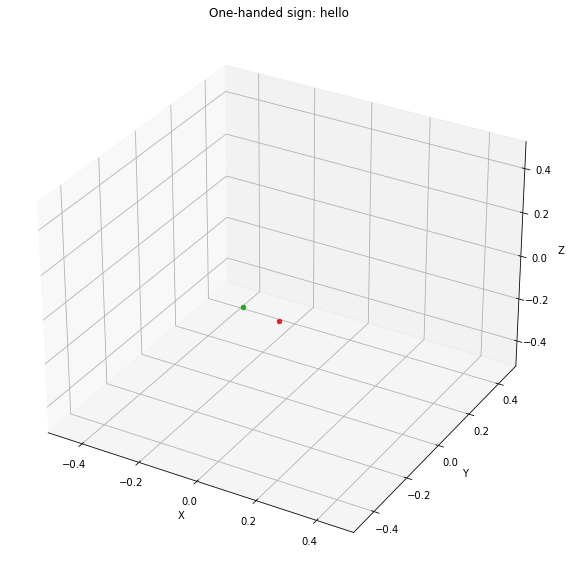

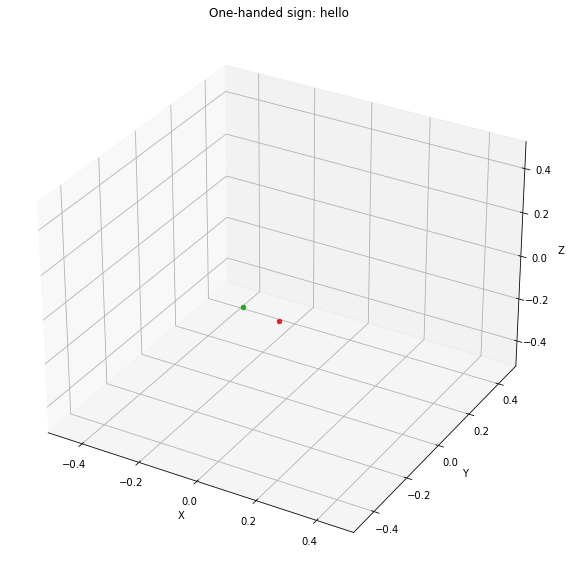

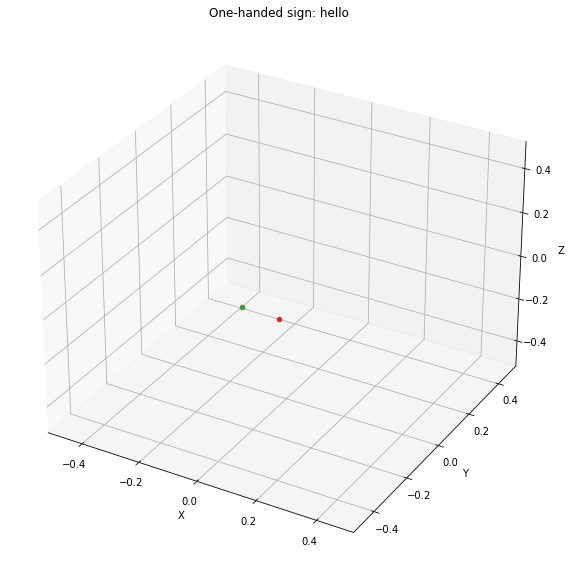

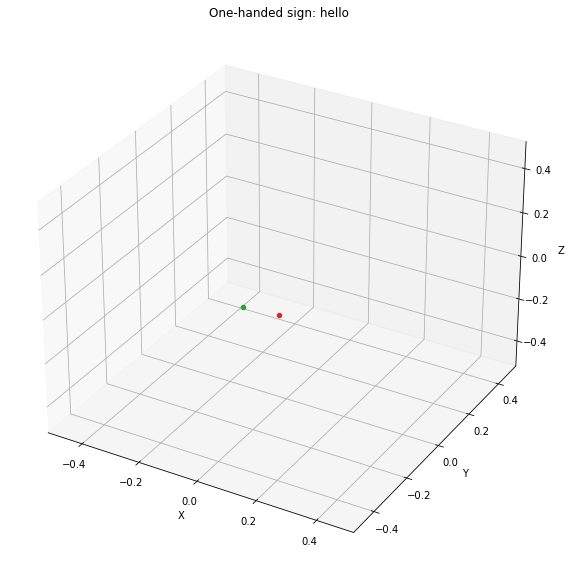

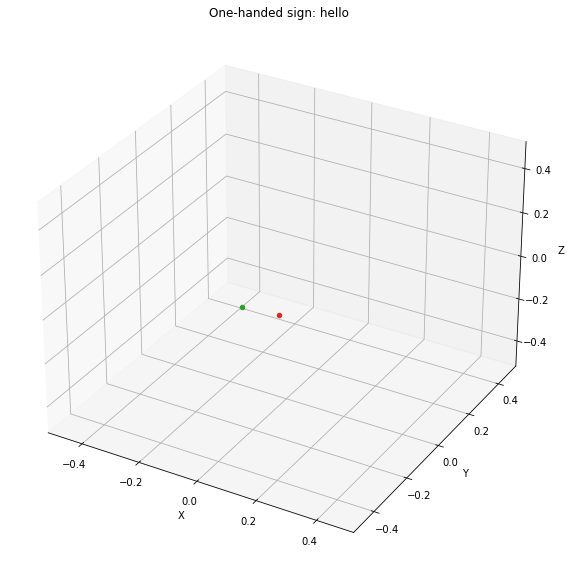

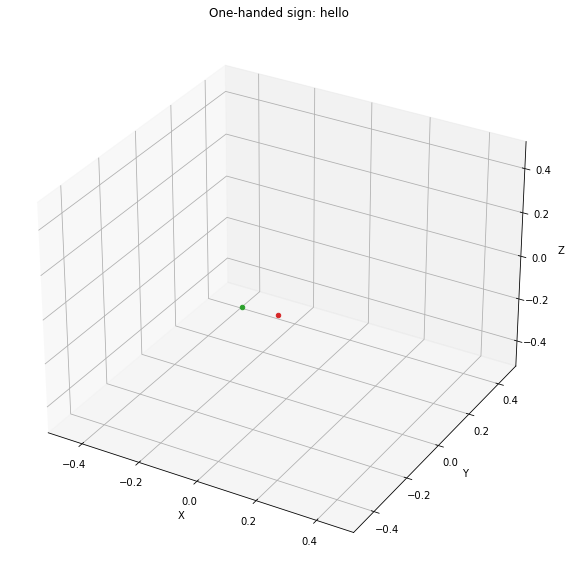

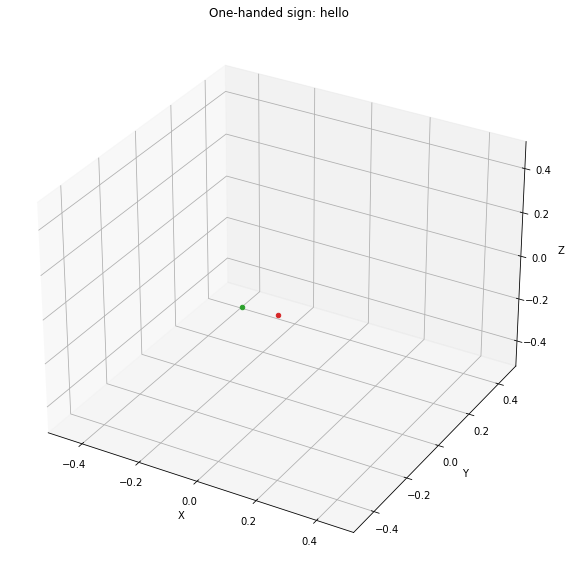

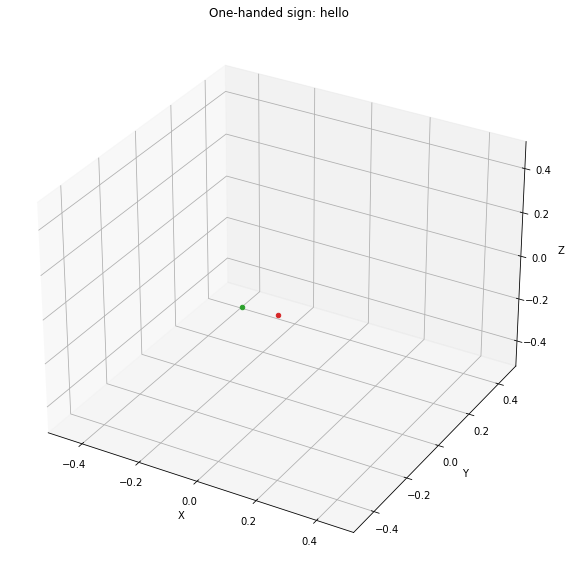

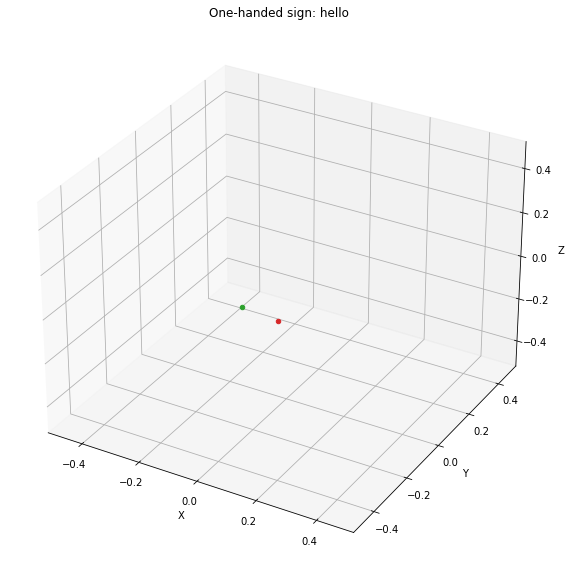

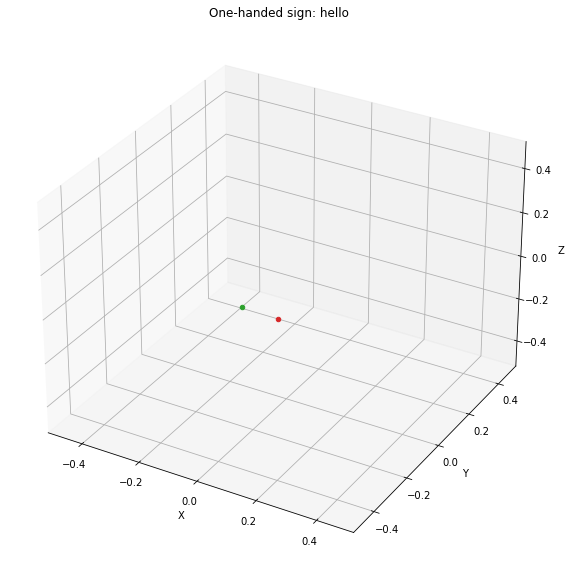

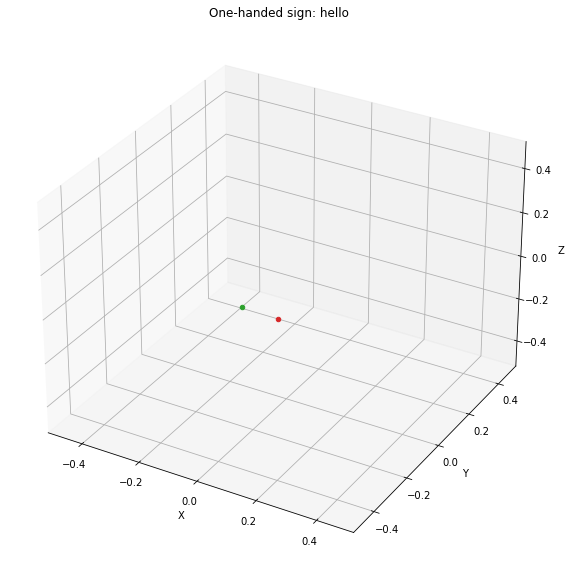

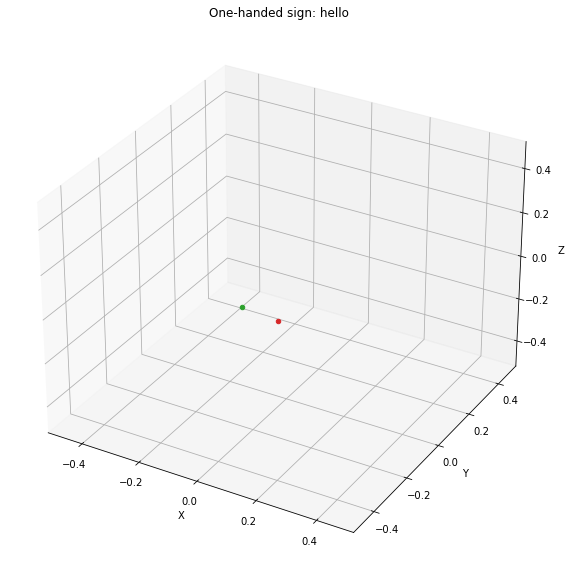

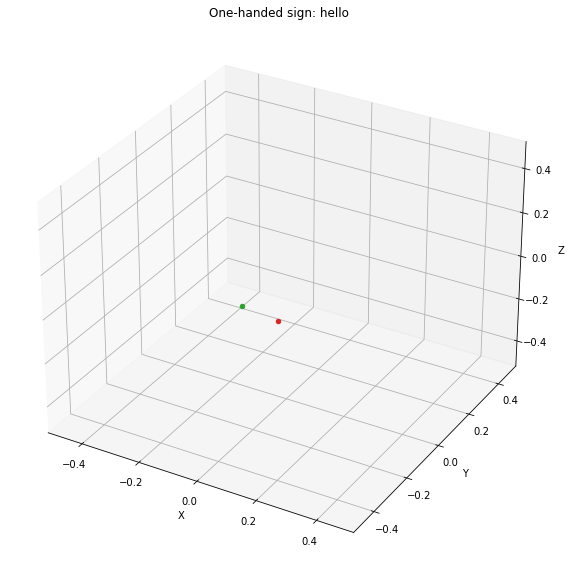

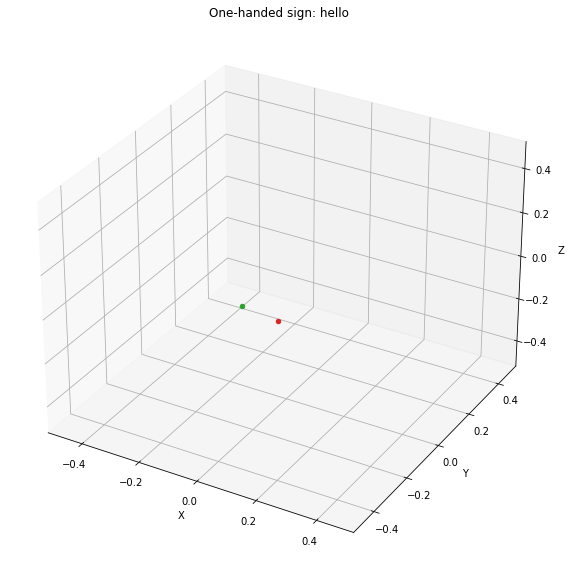

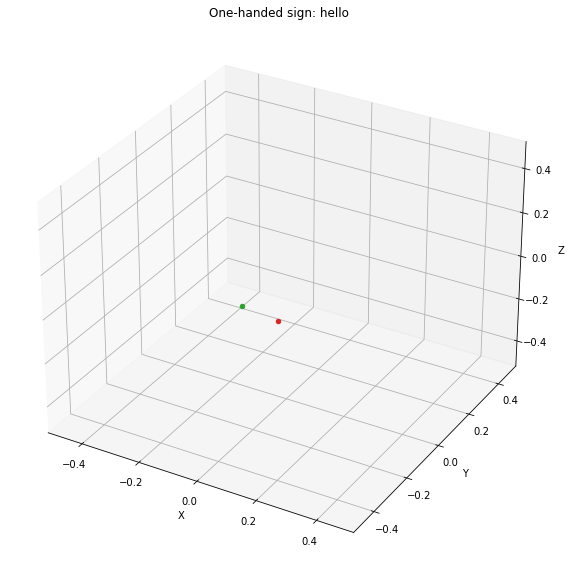

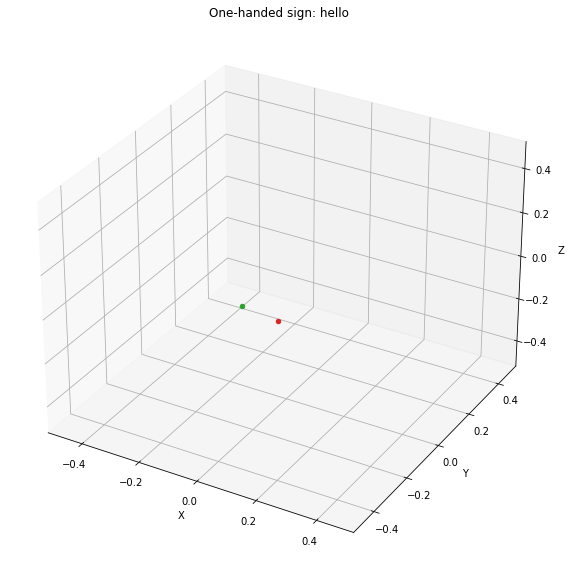

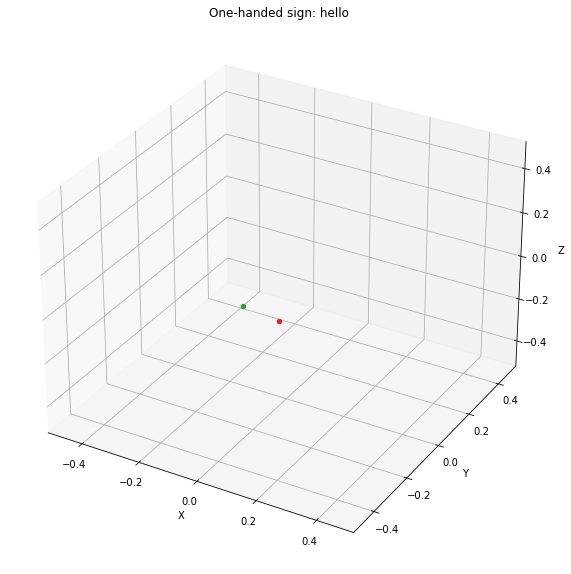

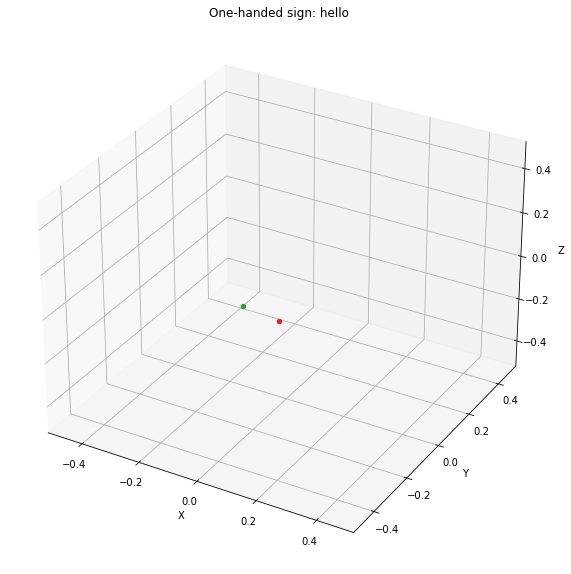

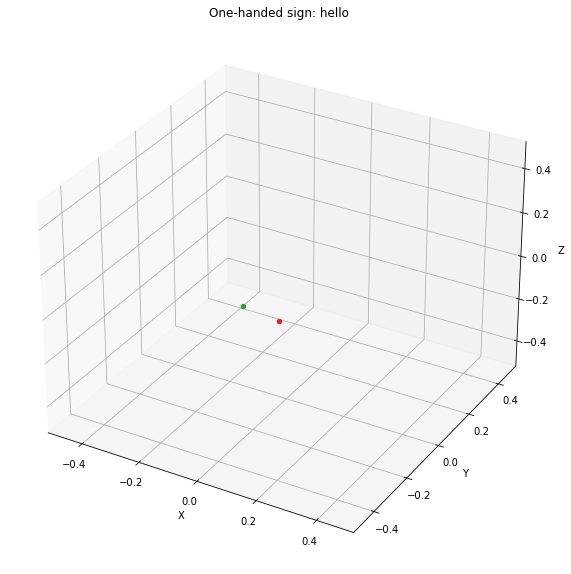

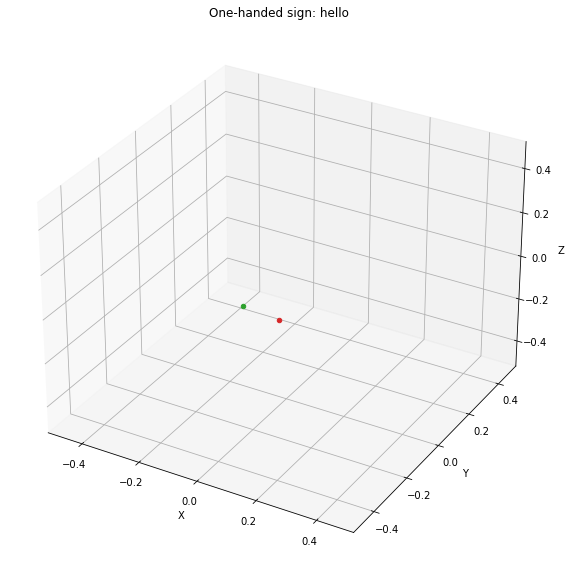

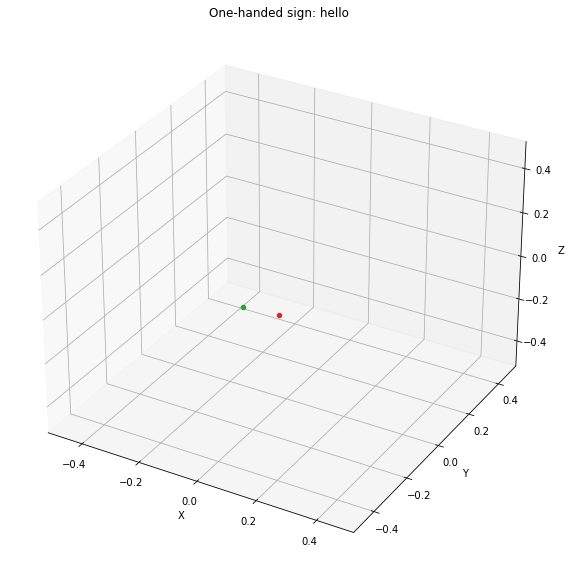

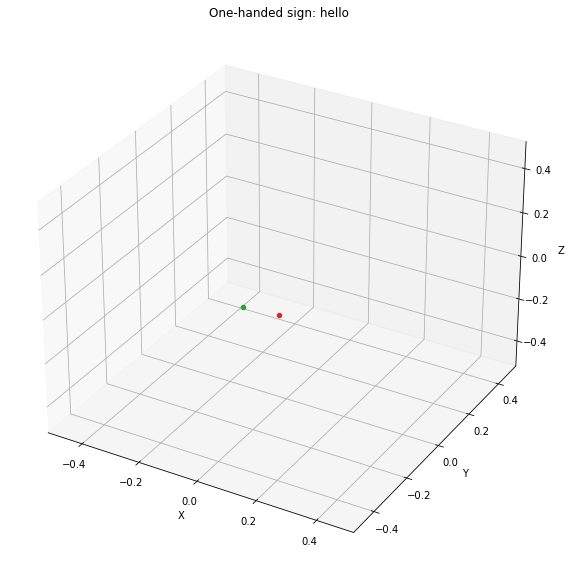

In [91]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(len(one_data)):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(projection='3d')
    sx_xs = one_data[:,0][i]
    sx_ys = one_data[:,1][i]
    sx_zs = one_data[:,2][i]
    dx_xs = one_data[:,11][i]
    dx_ys = one_data[:,12][i]
    dx_zs = one_data[:,13][i]

    ax.scatter(sx_xs, sx_ys, sx_zs, marker='o', label='sx', color='tab:green', alpha=1)
    ax.scatter(dx_xs, dx_ys, dx_zs, marker='o', label='sx', color='tab:red', alpha=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    '''ax.set_xlim(np.min( np.min(sx_xs), np.min(dx_xs) ), np.max( np.max(sx_xs), np.max(dx_xs) ))
    ax.set_ylim(np.min( np.min(sx_ys), np.min(dx_ys) ), np.max( np.max(sx_ys), np.max(dx_ys) ))
    ax.set_zlim(np.min( np.min(sx_zs), np.min(dx_zs) ), np.max( np.max(sx_zs), np.max(dx_zs) ))'''
    
    ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(-0.5, 0.5)
    

    plt.title('One-handed sign: hello')
    if i < 10:
        plt.savefig(f"hello_gif/00{i}_hello.png", format='png', dpi=300)
    else:
        plt.savefig(f"hello_gif/0{i}_hello.png", format='png', dpi=300)

In [92]:
import cv2
import numpy as np
import glob

imgs = []
for filename in glob.glob('hello_gif/*.png'):
    imgs.append(filename)

sorted(imgs)

['hello_gif/000_hello.png',
 'hello_gif/001_hello.png',
 'hello_gif/002_hello.png',
 'hello_gif/003_hello.png',
 'hello_gif/004_hello.png',
 'hello_gif/005_hello.png',
 'hello_gif/006_hello.png',
 'hello_gif/007_hello.png',
 'hello_gif/008_hello.png',
 'hello_gif/009_hello.png',
 'hello_gif/010_hello.png',
 'hello_gif/011_hello.png',
 'hello_gif/012_hello.png',
 'hello_gif/013_hello.png',
 'hello_gif/014_hello.png',
 'hello_gif/015_hello.png',
 'hello_gif/016_hello.png',
 'hello_gif/017_hello.png',
 'hello_gif/018_hello.png',
 'hello_gif/019_hello.png',
 'hello_gif/020_hello.png',
 'hello_gif/021_hello.png',
 'hello_gif/022_hello.png',
 'hello_gif/023_hello.png',
 'hello_gif/024_hello.png',
 'hello_gif/025_hello.png',
 'hello_gif/026_hello.png',
 'hello_gif/027_hello.png',
 'hello_gif/028_hello.png',
 'hello_gif/029_hello.png',
 'hello_gif/030_hello.png',
 'hello_gif/031_hello.png',
 'hello_gif/032_hello.png',
 'hello_gif/033_hello.png',
 'hello_gif/034_hello.png',
 'hello_gif/035_hell

In [94]:
import cv2
import numpy as np
import glob

img_array = []
imgs = []
for filename in glob.glob('hello_gif/*.png'):
    imgs.append(filename)
for filename in sorted(imgs):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

['hello_gif/0_hello.png',
 'hello_gif/10_hello.png',
 'hello_gif/11_hello.png',
 'hello_gif/12_hello.png',
 'hello_gif/13_hello.png',
 'hello_gif/14_hello.png',
 'hello_gif/15_hello.png',
 'hello_gif/16_hello.png',
 'hello_gif/17_hello.png',
 'hello_gif/18_hello.png',
 'hello_gif/19_hello.png',
 'hello_gif/1_hello.png',
 'hello_gif/20_hello.png',
 'hello_gif/21_hello.png',
 'hello_gif/22_hello.png',
 'hello_gif/23_hello.png',
 'hello_gif/24_hello.png',
 'hello_gif/25_hello.png',
 'hello_gif/26_hello.png',
 'hello_gif/27_hello.png',
 'hello_gif/28_hello.png',
 'hello_gif/29_hello.png',
 'hello_gif/2_hello.png',
 'hello_gif/30_hello.png',
 'hello_gif/31_hello.png',
 'hello_gif/32_hello.png',
 'hello_gif/33_hello.png',
 'hello_gif/34_hello.png',
 'hello_gif/35_hello.png',
 'hello_gif/36_hello.png',
 'hello_gif/37_hello.png',
 'hello_gif/38_hello.png',
 'hello_gif/39_hello.png',
 'hello_gif/3_hello.png',
 'hello_gif/40_hello.png',
 'hello_gif/41_hello.png',
 'hello_gif/42_hello.png',
 'hel

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_14770/810478034.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,10))


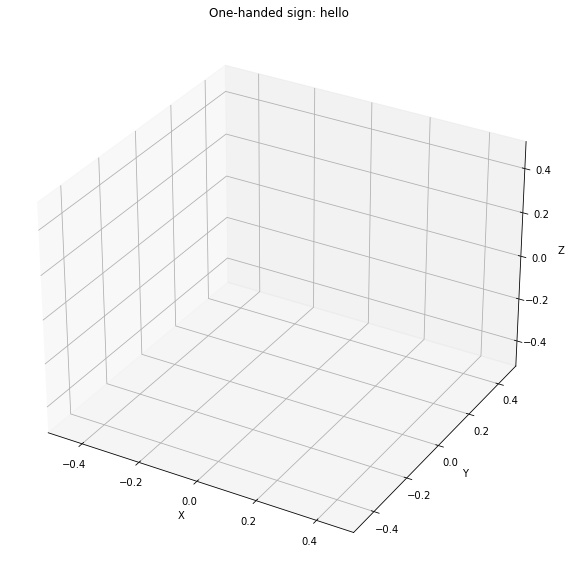

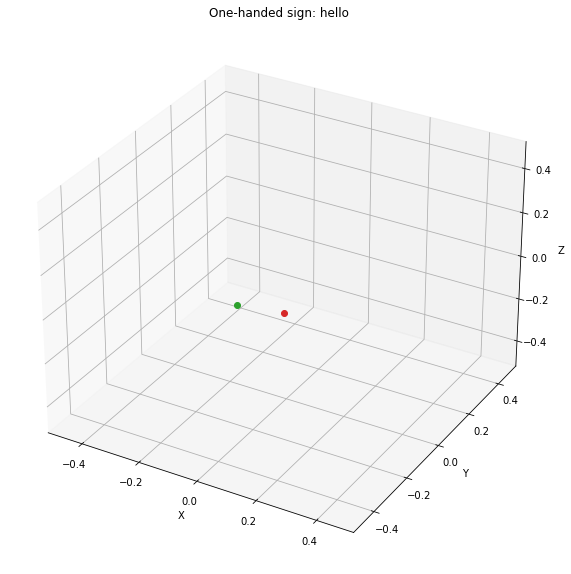

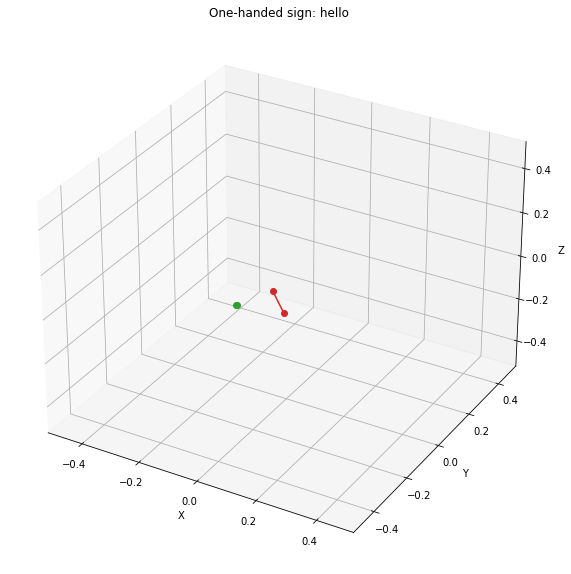

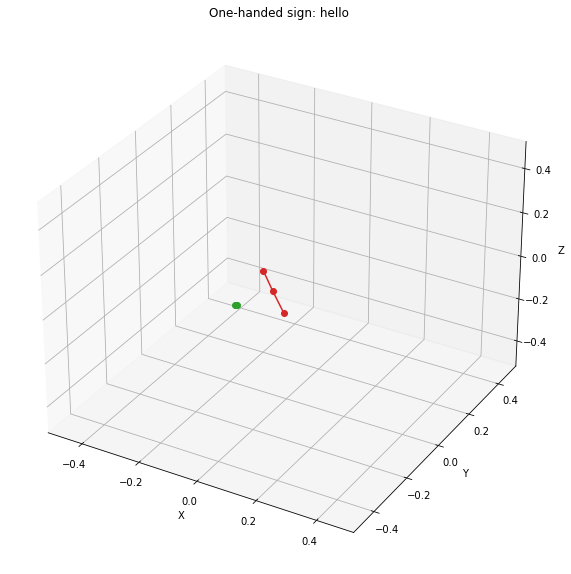

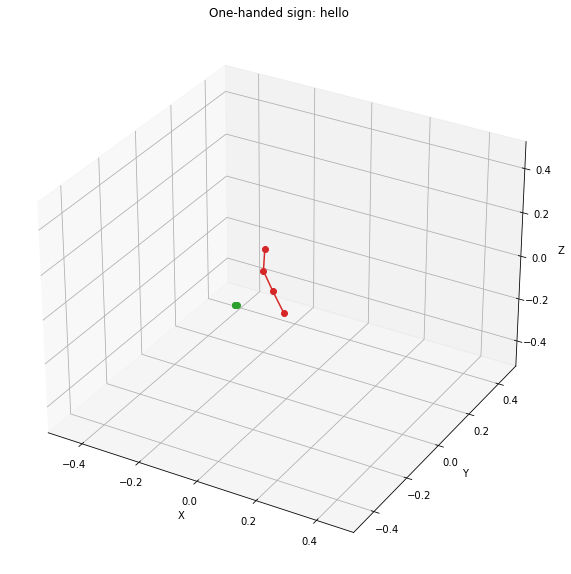

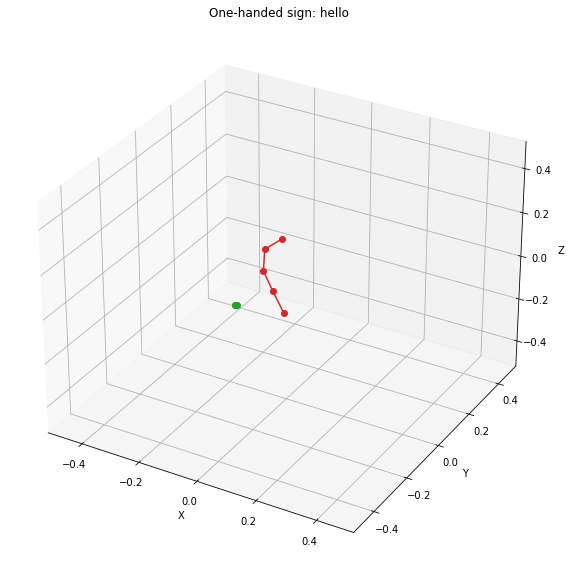

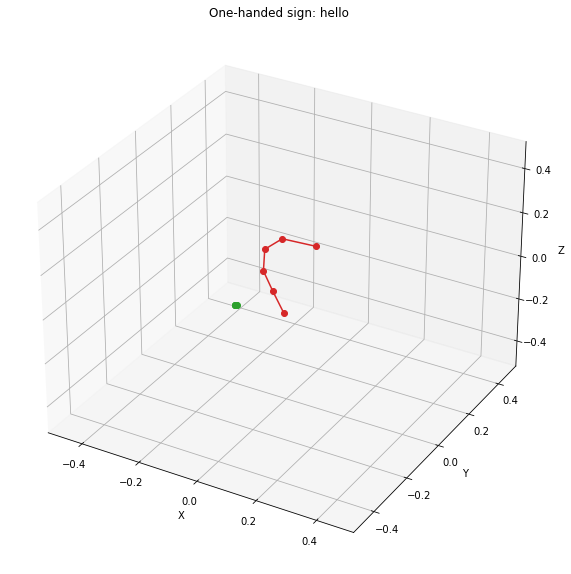

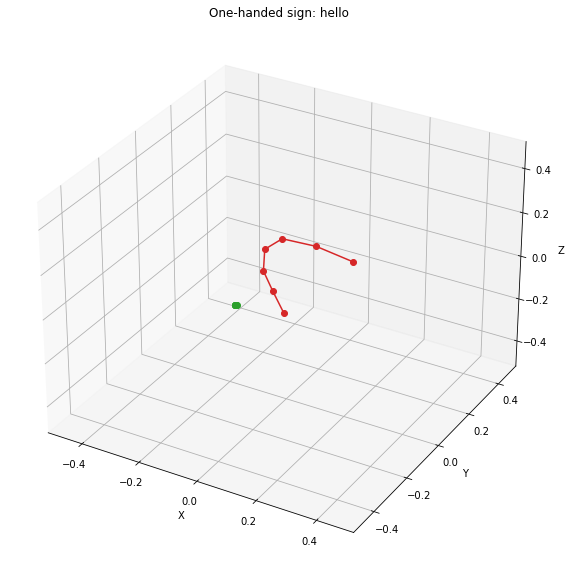

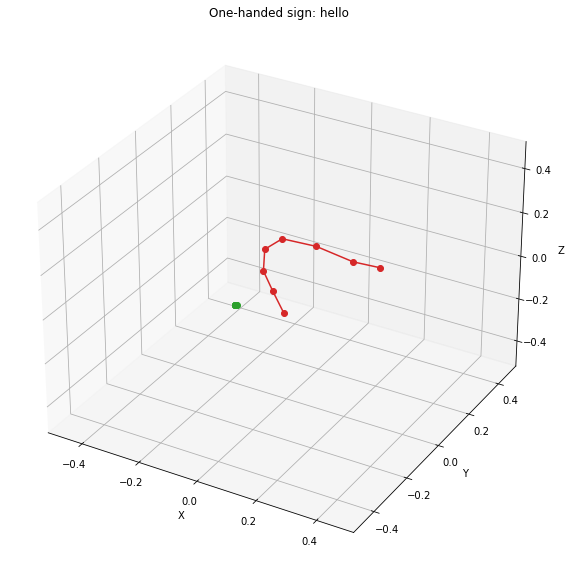

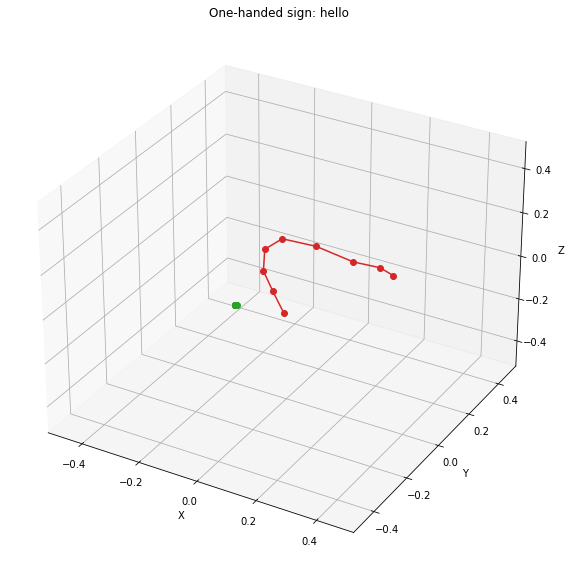

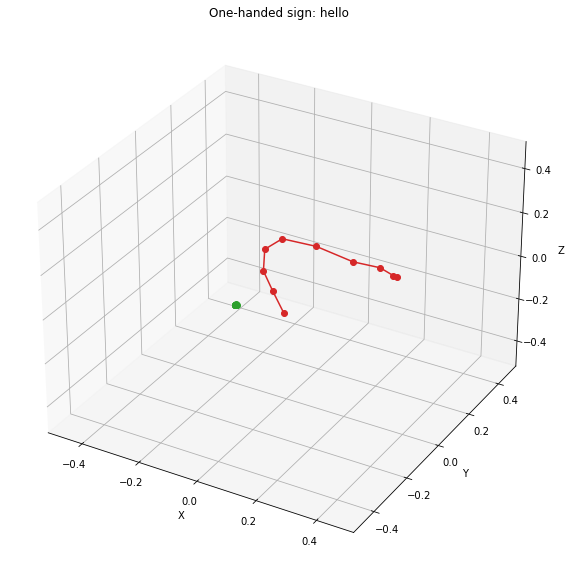

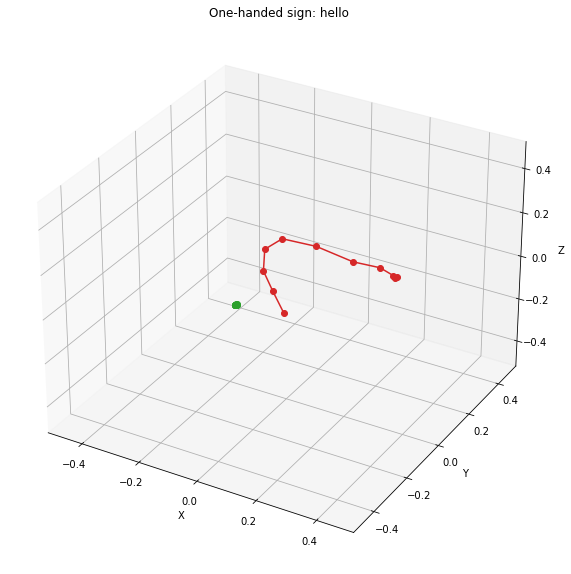

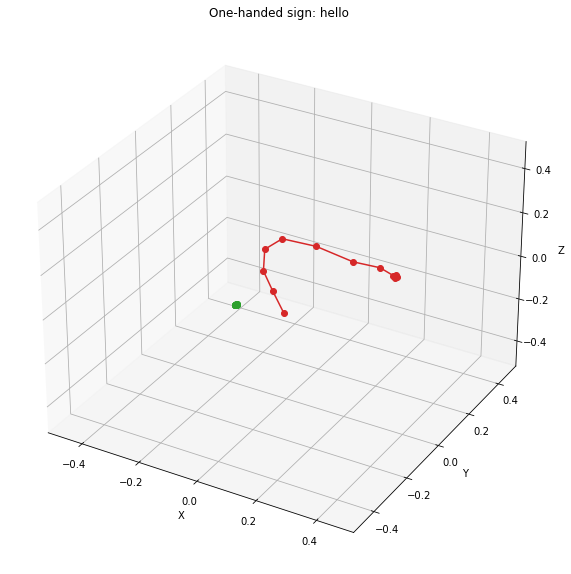

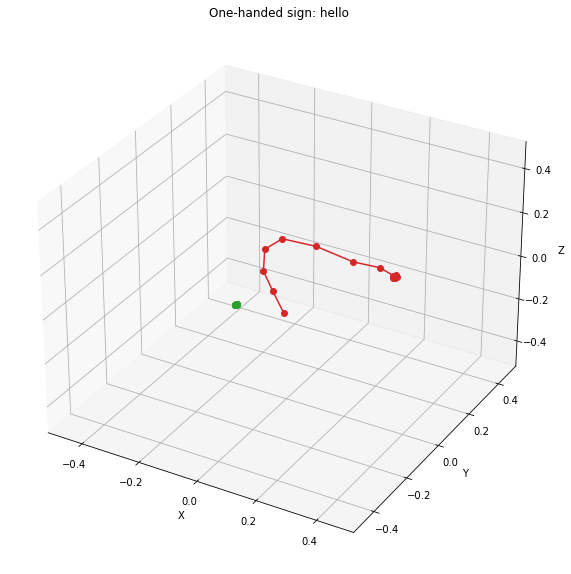

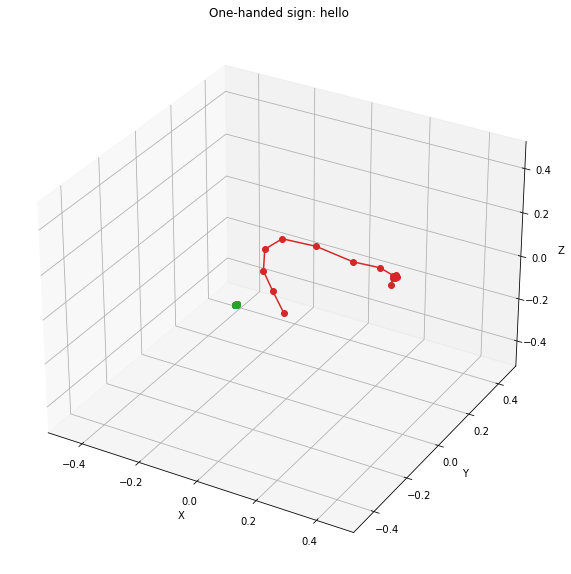

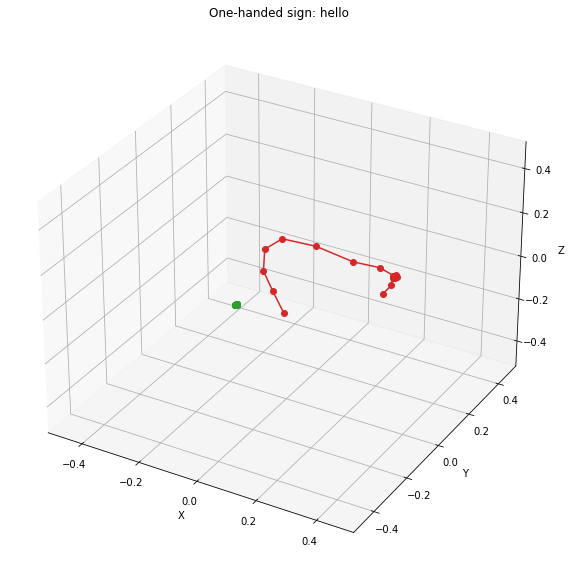

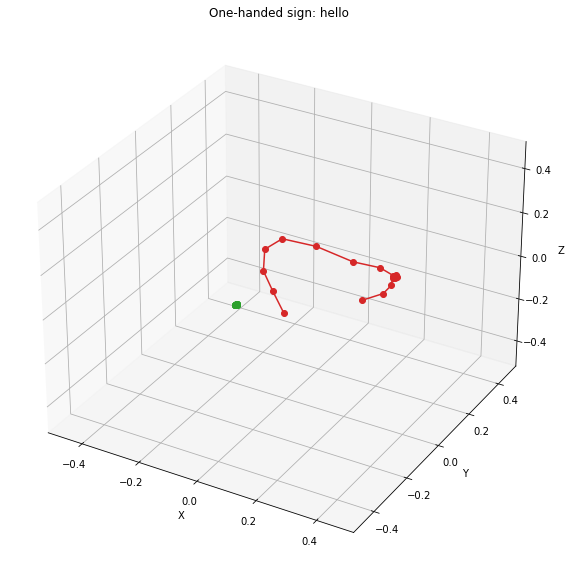

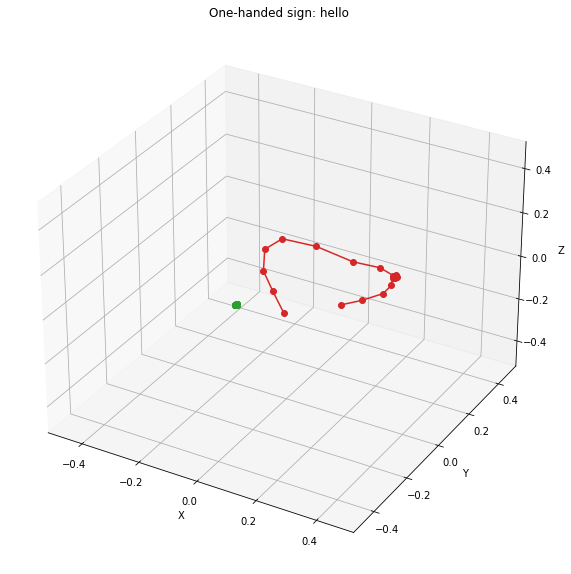

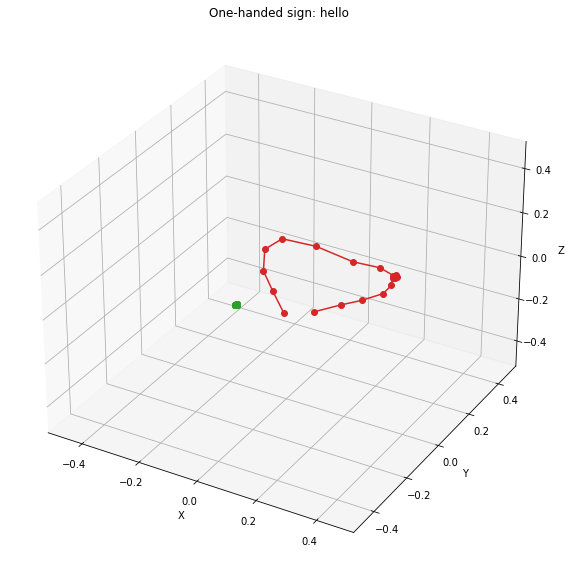

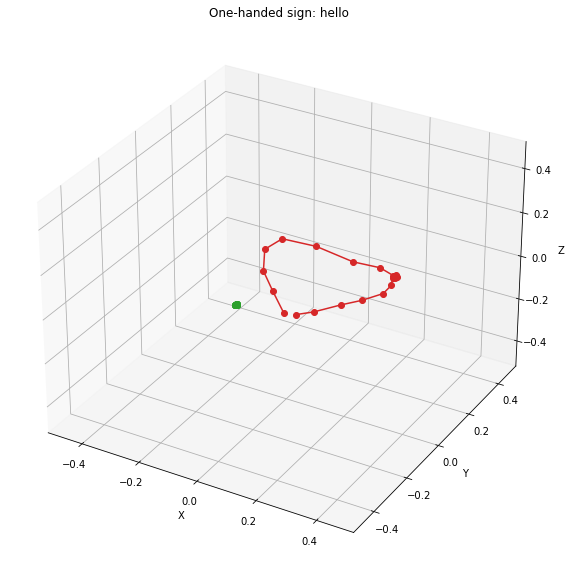

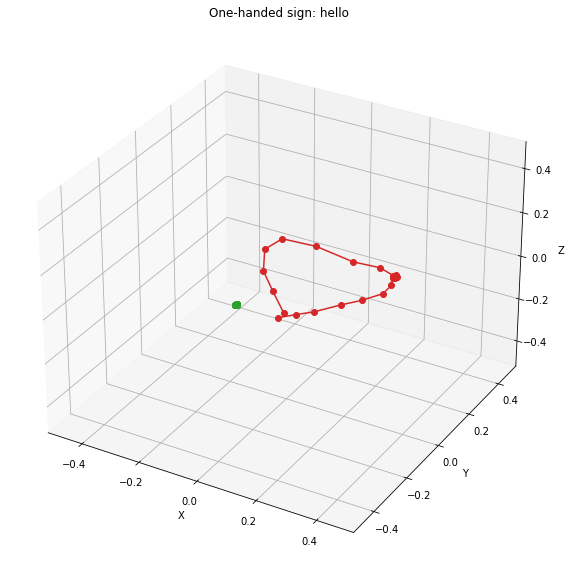

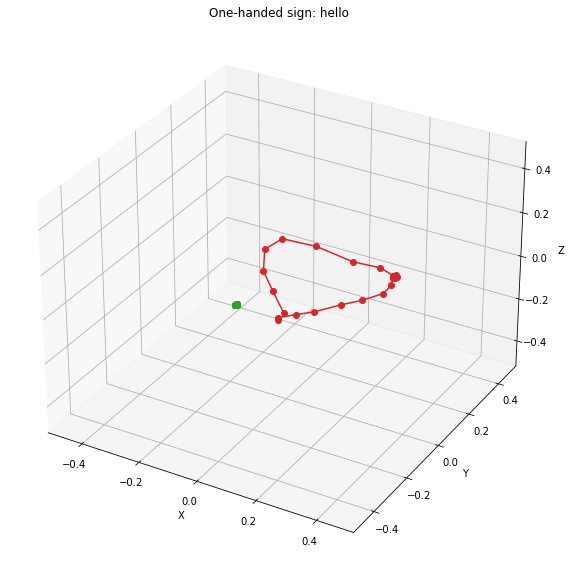

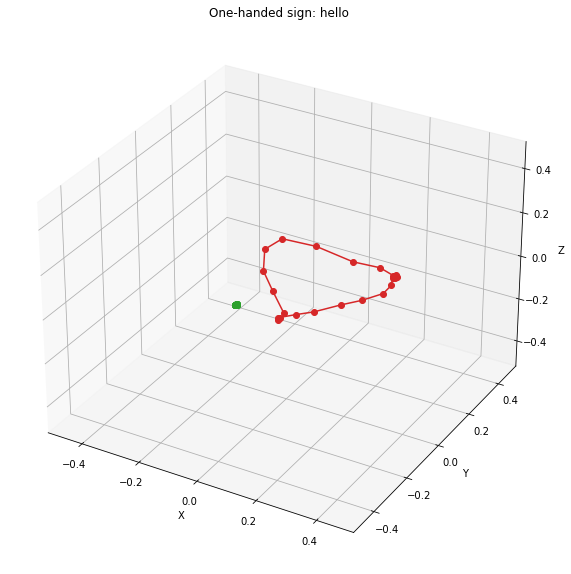

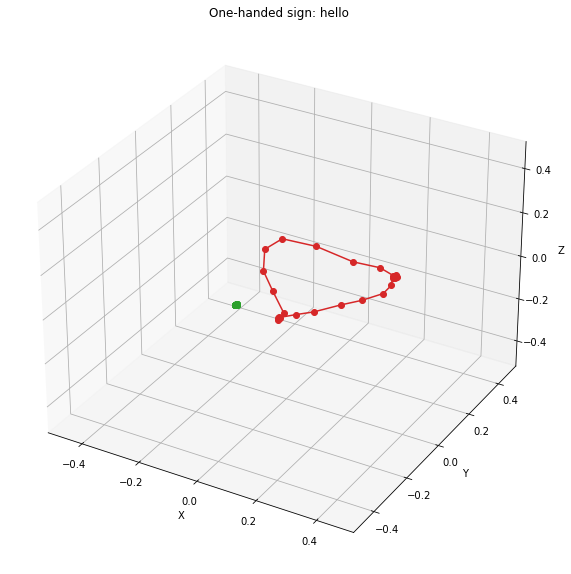

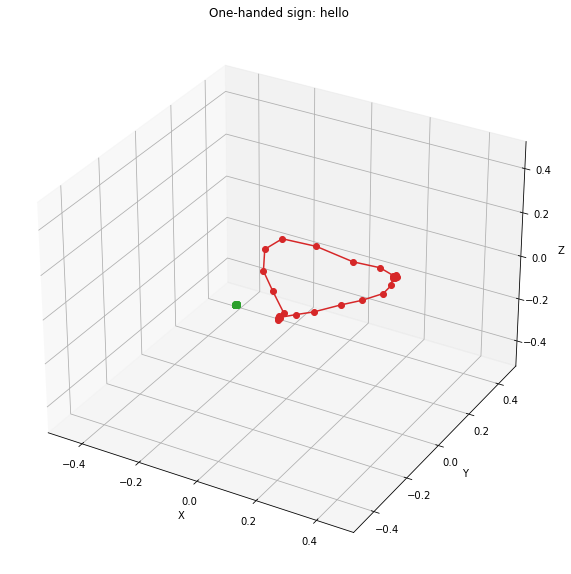

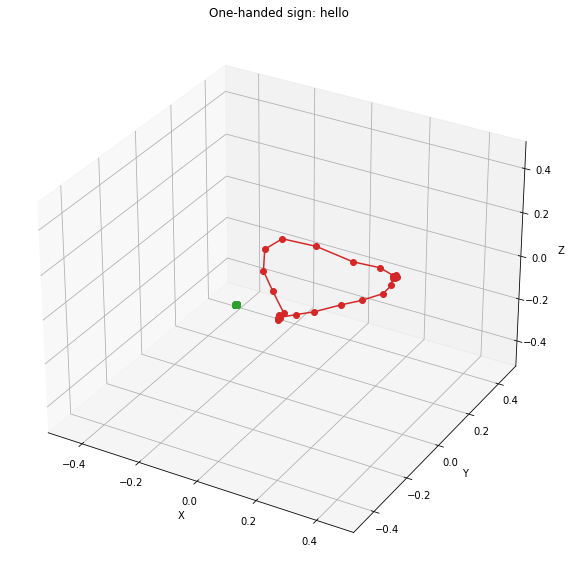

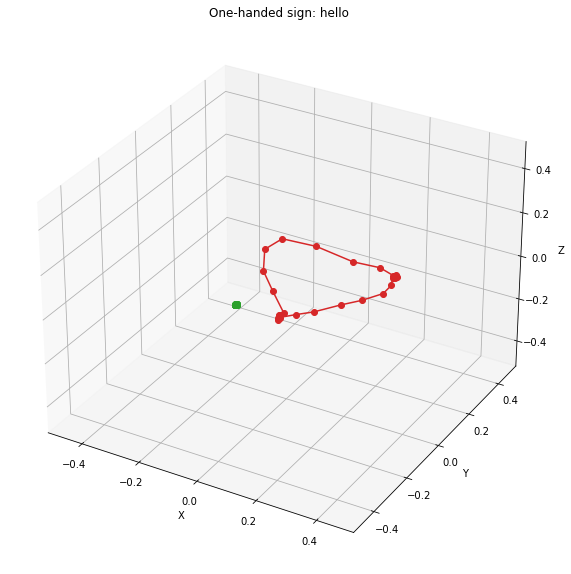

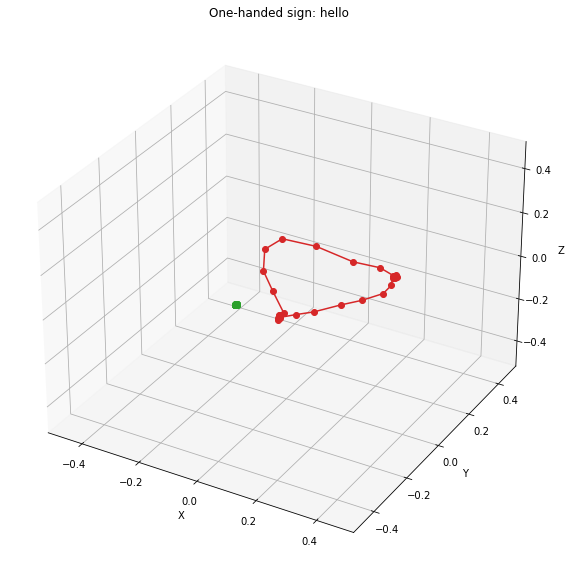

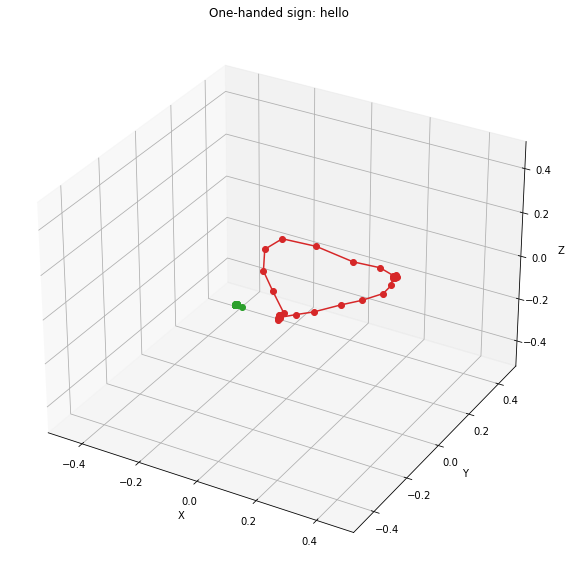

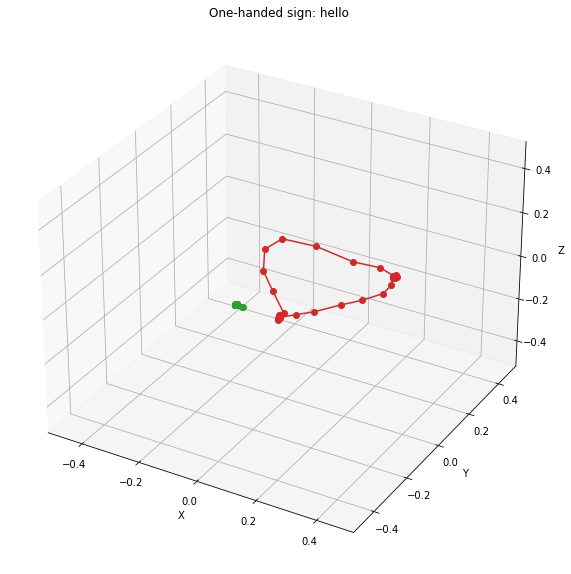

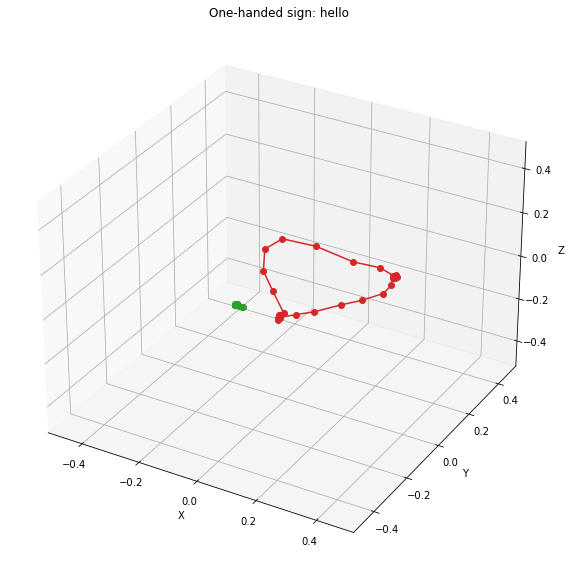

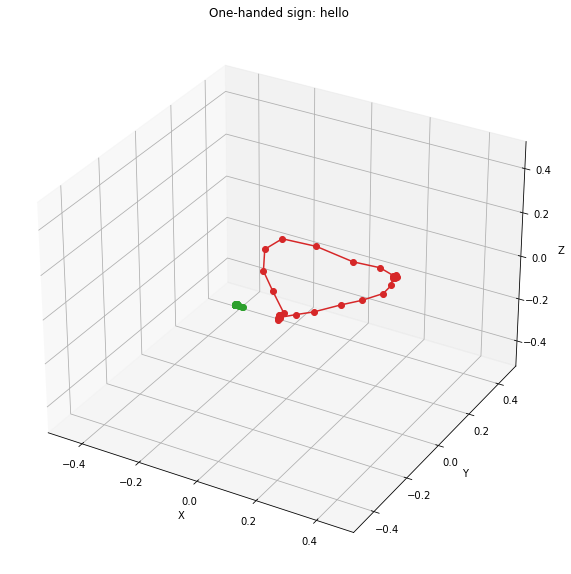

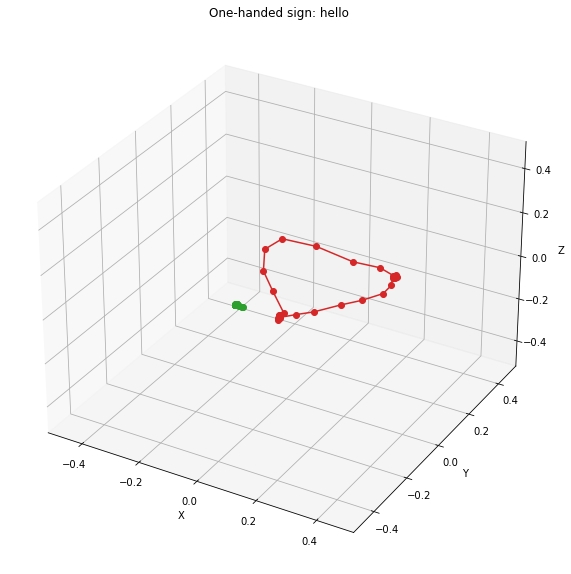

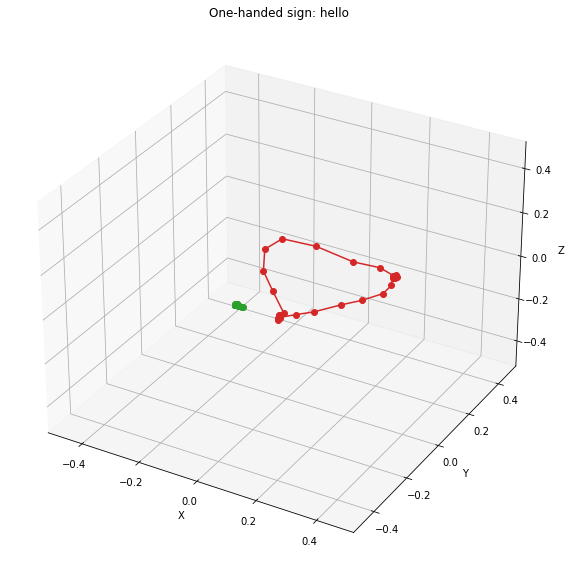

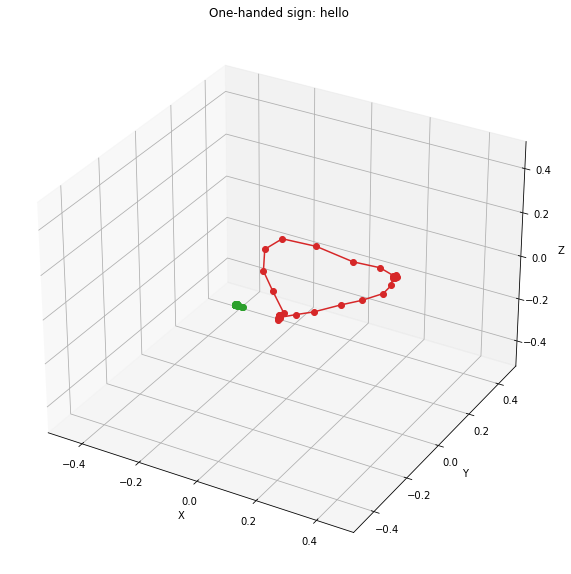

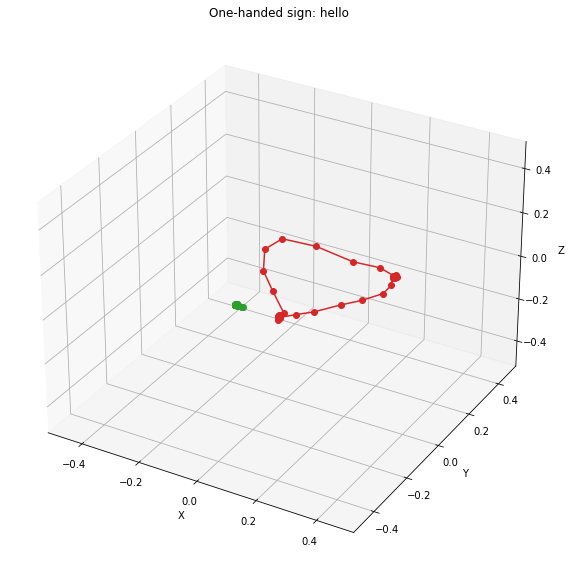

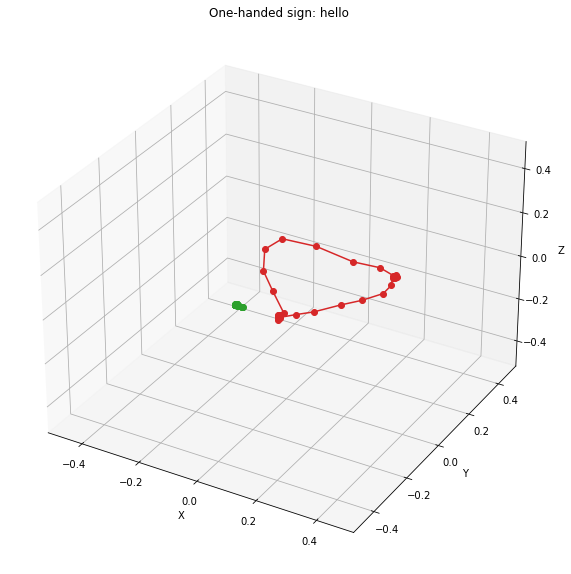

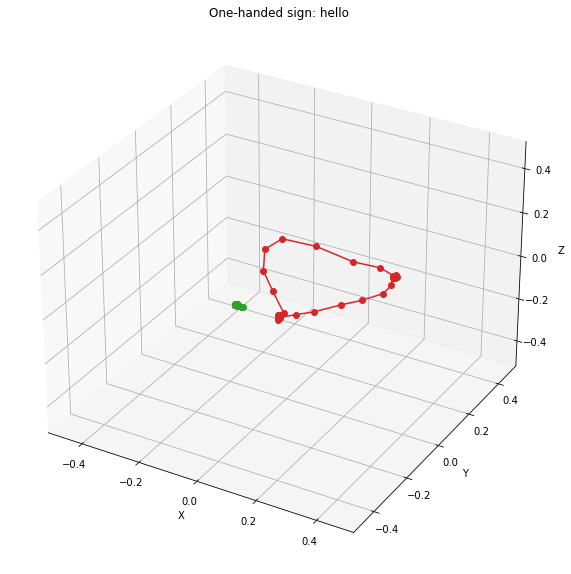

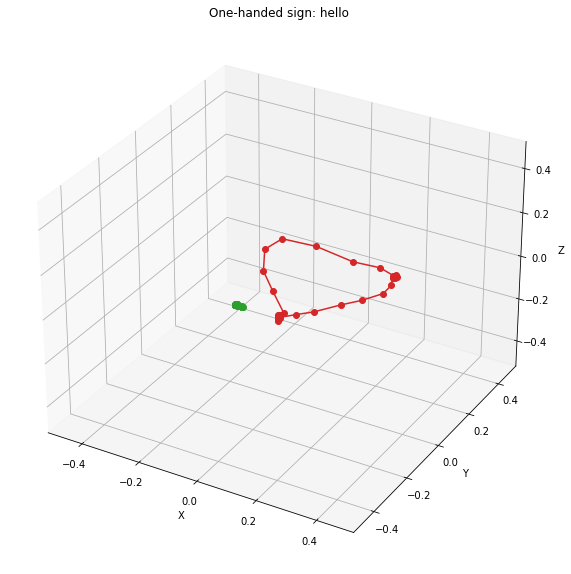

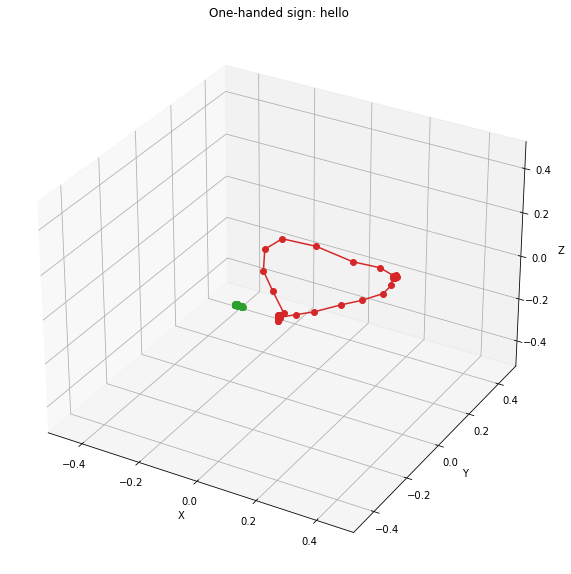

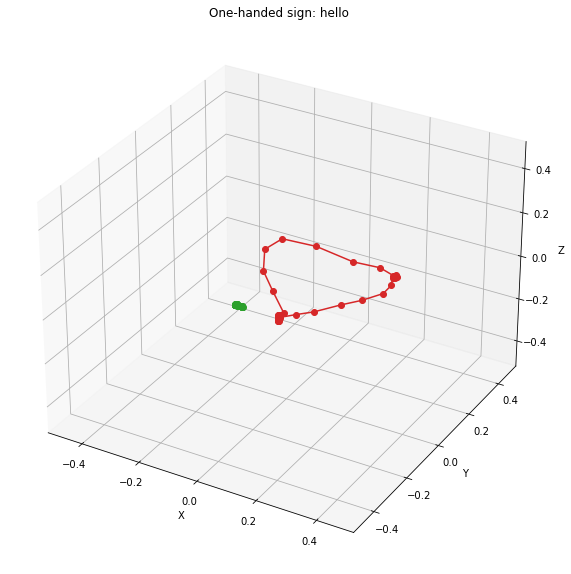

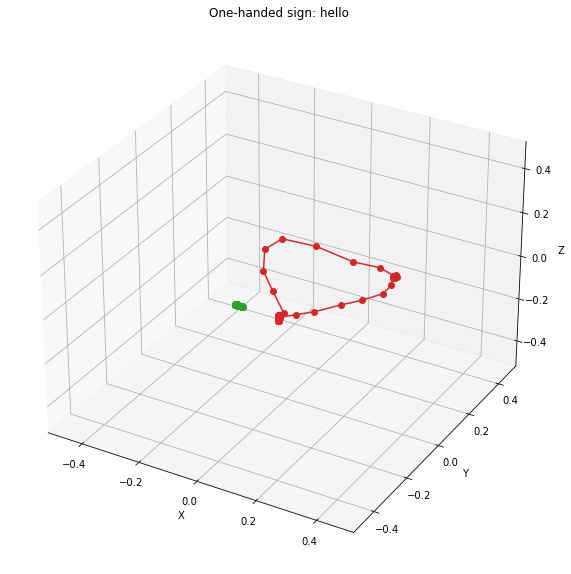

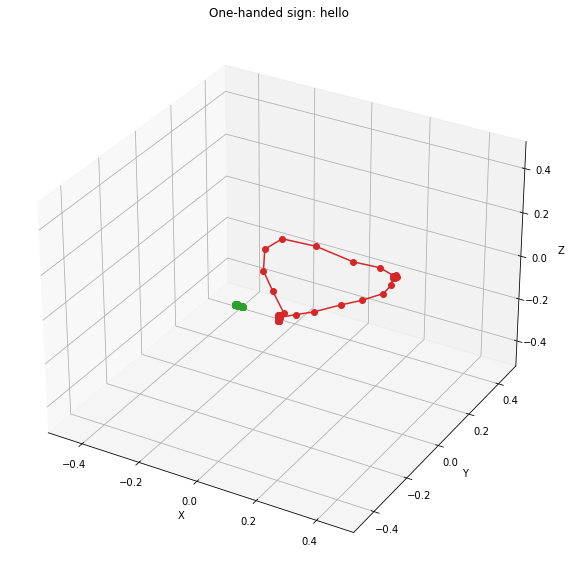

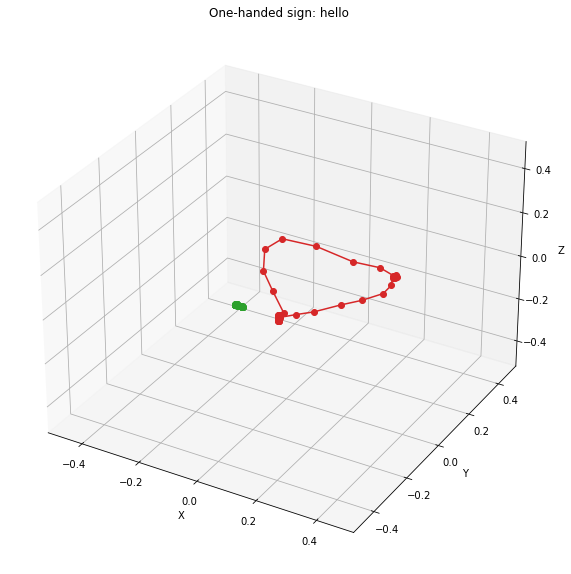

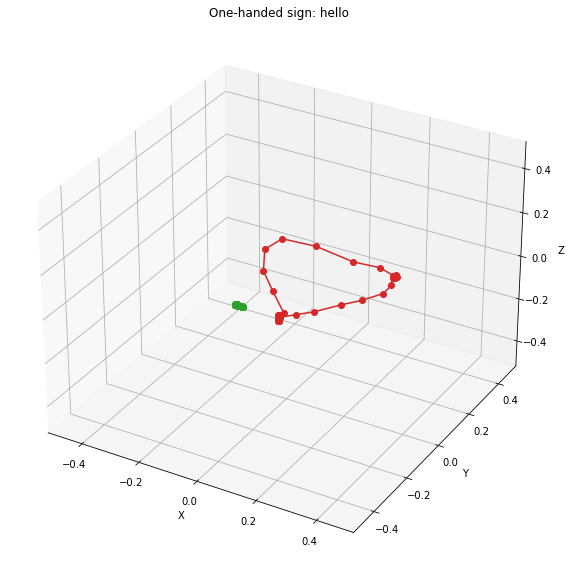

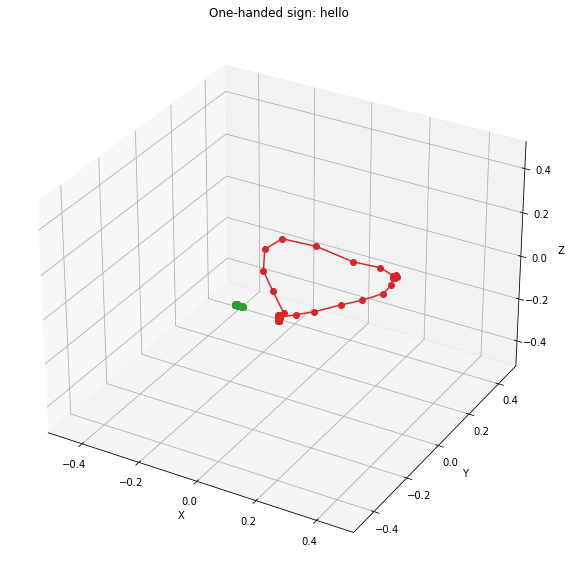

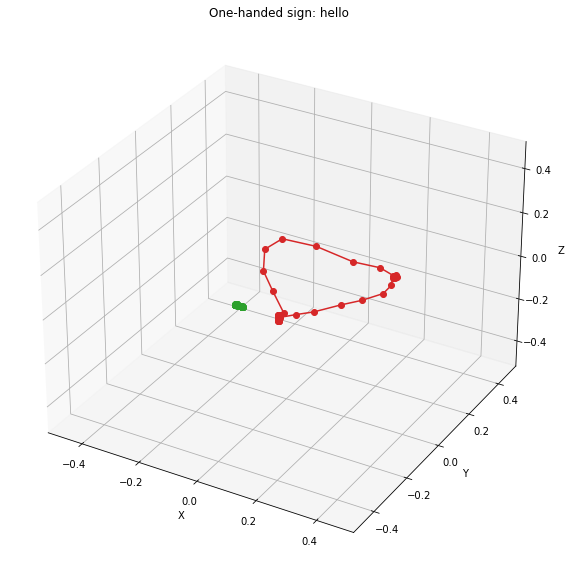

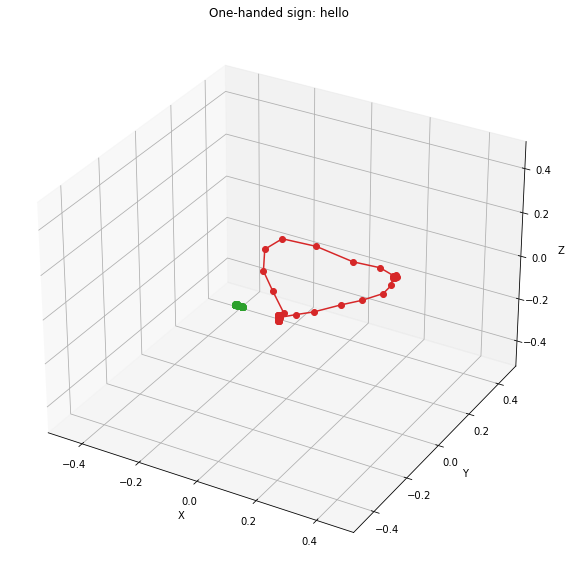

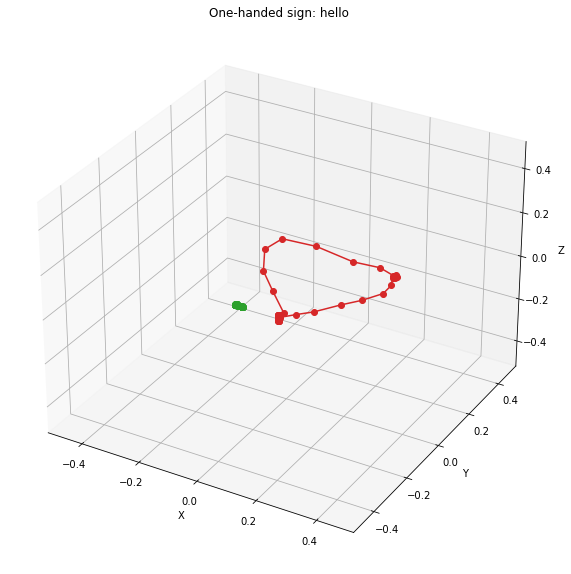

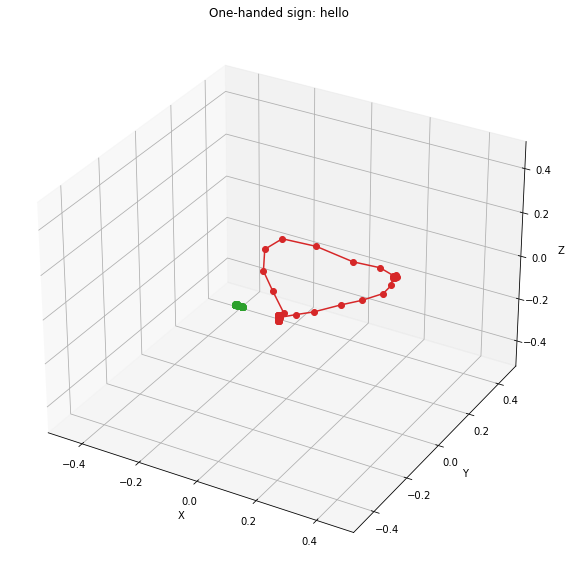

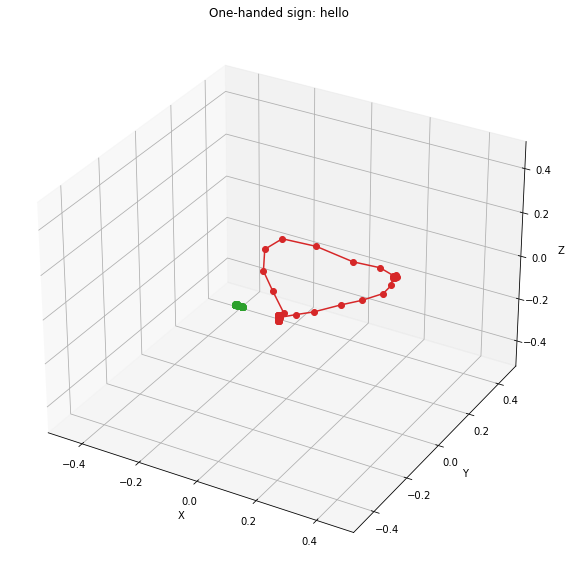

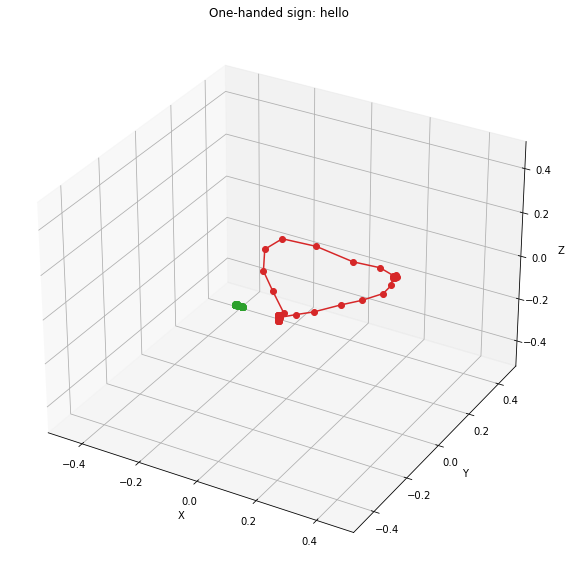

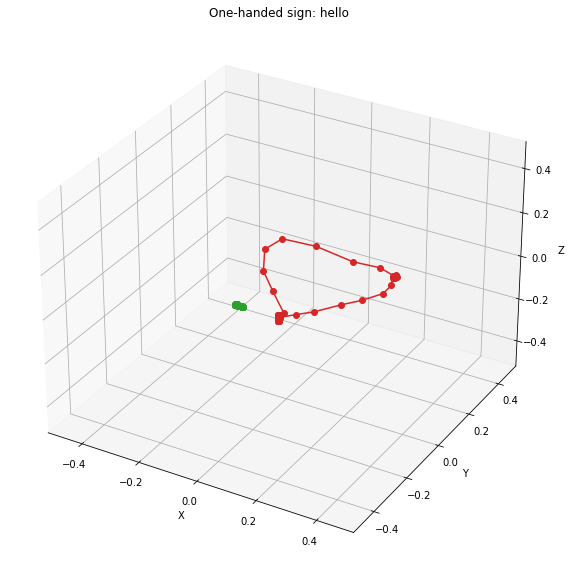

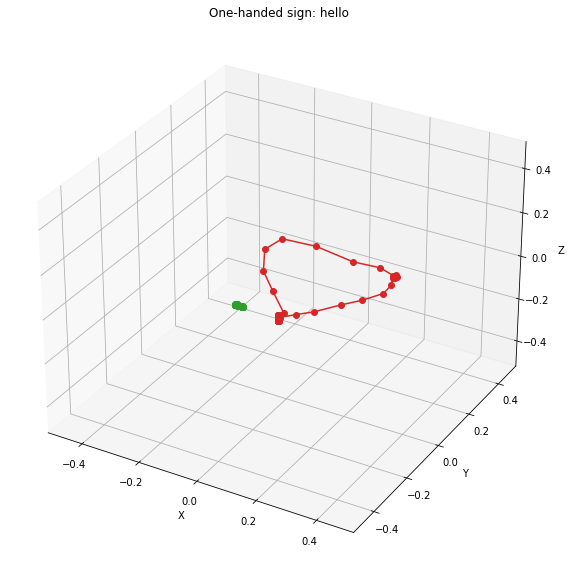

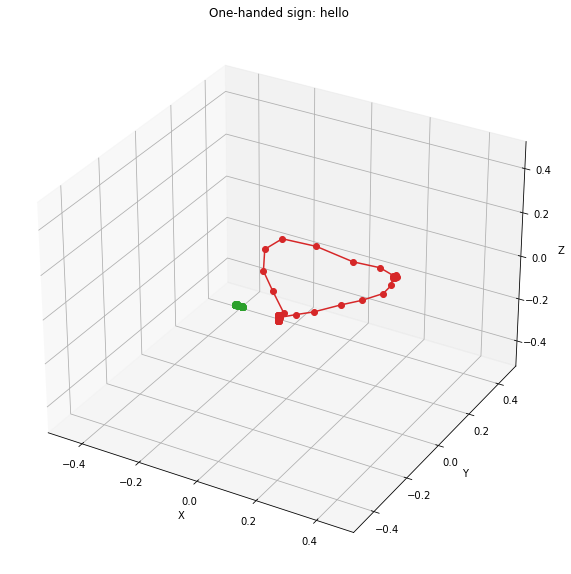

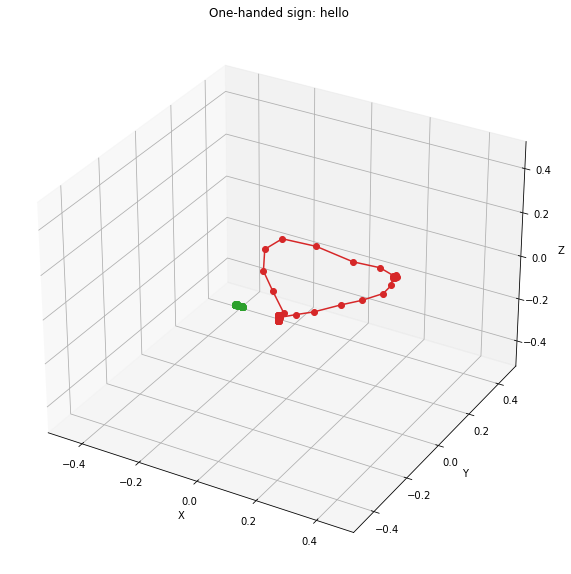

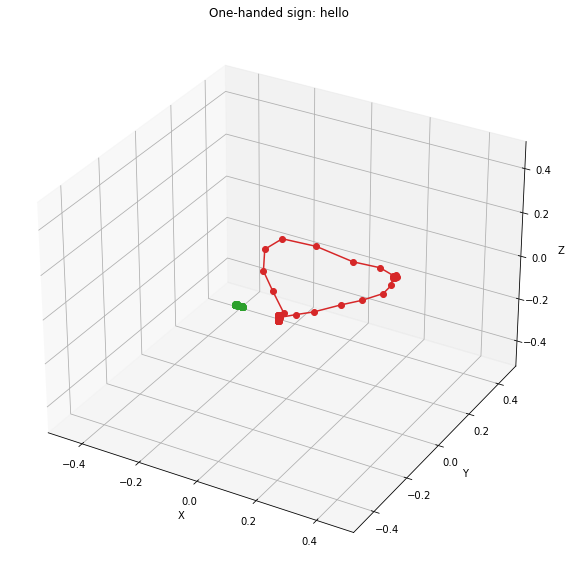

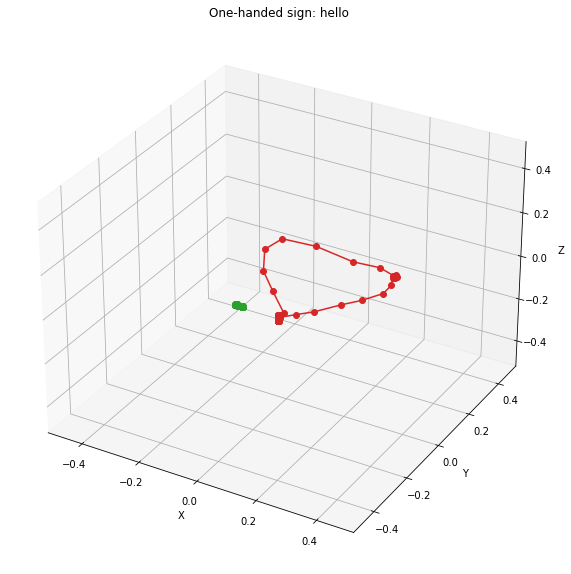

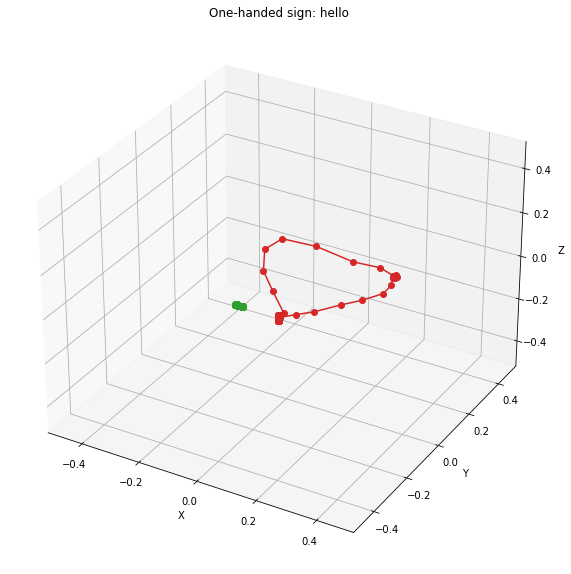

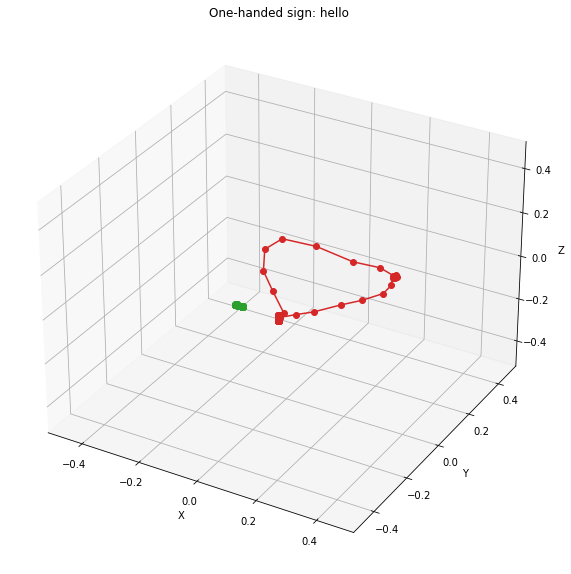

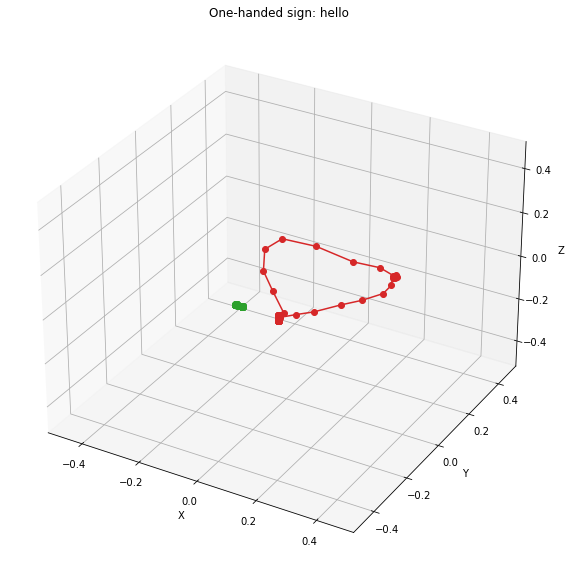

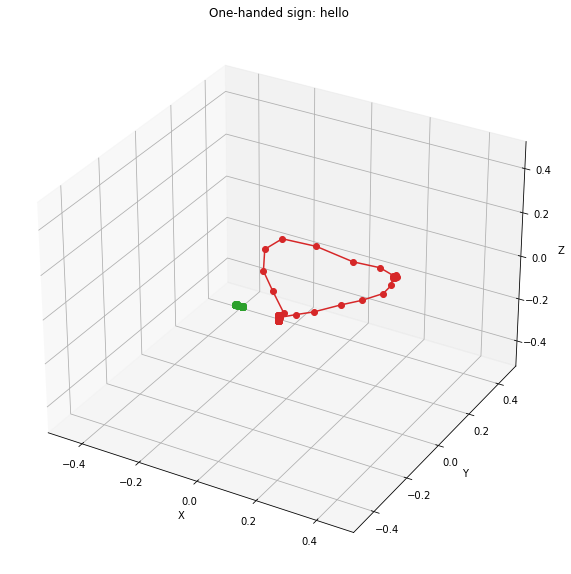

In [95]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(len(one_data)):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(projection='3d')
    sx_xs = one_data[:,0][:i]
    sx_ys = one_data[:,1][:i]
    sx_zs = one_data[:,2][:i]
    dx_xs = one_data[:,11][:i]
    dx_ys = one_data[:,12][:i]
    dx_zs = one_data[:,13][:i]

    ax.plot(sx_xs, sx_ys, sx_zs, marker='o', label='sx', color='tab:green', alpha=1)
    ax.plot(dx_xs, dx_ys, dx_zs, marker='o', label='sx', color='tab:red', alpha=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    '''ax.set_xlim(np.min( np.min(sx_xs), np.min(dx_xs) ), np.max( np.max(sx_xs), np.max(dx_xs) ))
    ax.set_ylim(np.min( np.min(sx_ys), np.min(dx_ys) ), np.max( np.max(sx_ys), np.max(dx_ys) ))
    ax.set_zlim(np.min( np.min(sx_zs), np.min(dx_zs) ), np.max( np.max(sx_zs), np.max(dx_zs) ))'''
    
    ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(-0.5, 0.5)
    

    plt.title('One-handed sign: hello')
    if i < 10:
        plt.savefig(f"hello_line_gif/00{i}_hello.png", format='png', dpi=300)
    else:
        plt.savefig(f"hello_line_gif/0{i}_hello.png", format='png', dpi=300)

In [96]:
import cv2
import numpy as np
import glob

img_array = []
imgs = []
for filename in glob.glob('hello_line_gif/*.png'):
    imgs.append(filename)
for filename in sorted(imgs):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'MP4V'), 10, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
